# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset
data = load_iris()
X = data['data']
y = data['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sklearn GridSearchCV

In [3]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5]
}

In [4]:
# Scikit-learn GridSearchCV
sklearn_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
sklearn_search.fit(X_train, y_train)

# Print results
print("sklearn GridSearchCV Best Parameters:", sklearn_search.best_params_)
print("sklearn GridSearchCV Best Score:", sklearn_search.best_score_)

sklearn GridSearchCV Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
sklearn GridSearchCV Best Score: 0.95


In [5]:
# Extract CV results
sklearn_results = sklearn_search.cv_results_

# Create DataFrame
sklearn_df = pd.DataFrame(sklearn_results)
sklearn_df.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010094,0.000678,0.001217,0.000078,5,2,10,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,1
1,0.048622,0.001698,0.003566,0.000535,5,2,50,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.958333,0.958333,0.833333,1.000000,0.958333,0.941667,0.056519,10
2,0.091091,0.003199,0.005000,0.000157,5,2,100,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.958333,0.958333,0.833333,1.000000,0.958333,0.941667,0.056519,10
3,0.010345,0.000631,0.001319,0.000074,5,5,10,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.958333,1.000000,0.833333,0.916667,0.958333,0.933333,0.056519,16
4,0.047813,0.003808,0.003125,0.000321,5,5,50,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,1
5,0.100744,0.003997,0.004950,0.000069,5,5,100,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,1
6,0.012606,0.002725,0.001496,0.000237,10,2,10,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,1
7,0.050907,0.006382,0.003337,0.000541,10,2,50,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.958333,0.958333,0.833333,1.000000,0.958333,0.941667,0.056519,10
8,0.094423,0.001358,0.005756,0.000775,10,2,100,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.958333,0.958333,0.833333,1.000000,0.958333,0.941667,0.056519,10
9,0.009778,0.000073,0.001272,0.000021,10,5,10,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.958333,1.000000,0.833333,0.916667,0.958333,0.933333,0.056519,16


In [6]:
# Scikit-learn GridSearchCV
sklearn_best_model = RandomForestClassifier(random_state=42, **sklearn_search.best_params_)
sklearn_best_model.fit(X_train, y_train)
sklearn_test_score = accuracy_score(y_test, sklearn_best_model.predict(X_test))
print("sklearn GridSearchCV Test Set Score:", sklearn_test_score)

sklearn GridSearchCV Test Set Score: 1.0


# Custom GridSearchCV

In [7]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, get_scorer
from sklearn.ensemble import RandomForestClassifier

class CustomGridSearchCV:
    def __init__(self, estimator, param_grid, cv=5, scoring=None, refit=True, verbose=0, random_state=None):
        self.estimator = estimator
        self.param_grid = param_grid
        self.random_state = random_state
        self.cv = self._get_cv_object(cv)
        self.scoring = self._validate_scoring(scoring)
        self.refit = refit
        self.verbose = verbose
        self.best_params_ = None
        self.best_score_ = -np.inf if self._is_maximizing_metric() else np.inf
        self.results_ = []
        self.log_ = []
        if random_state is not None:
            random.seed(random_state)

    def _get_cv_object(self, cv):
        if isinstance(cv, int):
            return KFold(n_splits=cv, shuffle=True, random_state=self.random_state)
        elif hasattr(cv, 'split'):
            return cv
        else:
            raise ValueError("cv must be an integer or an initialized cross-validation object")

    def _validate_scoring(self, scoring):
        if isinstance(scoring, str):
            return get_scorer(scoring)._score_func
        elif callable(scoring):
            return scoring
        else:
            return self._default_scoring()

    def _default_scoring(self):
        if hasattr(self.estimator, "predict_proba") or hasattr(self.estimator, "decision_function"):
            return accuracy_score  # Default for classification
        else:
            return mean_squared_error  # Default for regression

    def _is_maximizing_metric(self):
        return self.scoring == accuracy_score or self.scoring == r2_score

    def fit(self, X, y):
        param_combinations = self._get_param_combinations(self.param_grid)

        for params in param_combinations:
            if self.verbose > 0:
                print(f"Evaluating parameters: {params}")
            scores = []
            for fold, (train_idx, val_idx) in enumerate(self.cv.split(X)):
                X_train_fold, X_val_fold = X[train_idx], X[val_idx]
                y_train_fold, y_val_fold = y[train_idx], y[val_idx]

                # Set estimator parameters
                model = self.estimator.set_params(**params)
                model.fit(X_train_fold, y_train_fold)
                y_pred = model.predict(X_val_fold)

                score = self.scoring(y_val_fold, y_pred)
                scores.append(score)

                if self.verbose > 0:
                    print(f"Fold {fold + 1}: Score = {score}")

            avg_score = np.mean(scores)
            self.results_.append((params, avg_score))

            # Log the parameters and score
            self._log_hyperparameters(params, avg_score)

            # Determine if best score
            if (self._is_maximizing_metric() and avg_score > self.best_score_) or \
               (not self._is_maximizing_metric() and avg_score < self.best_score_):
                self.best_score_ = avg_score
                self.best_params_ = params

        # Refit the best model on the full dataset
        if self.refit:
            self.estimator.set_params(**self.best_params_)
            self.estimator.fit(X, y)

        return self

    def _log_hyperparameters(self, params, score):
        """
        Logs each hyperparameter combination and its score.
        """
        log_entry = params.copy()
        log_entry['score'] = score
        self.log_.append(log_entry)

    def _get_param_combinations(self, param_grid):
        import itertools
        keys, values = zip(*param_grid.items())
        return [dict(zip(keys, v)) for v in itertools.product(*values)]

    def score(self, X, y):
        y_pred = self.estimator.predict(X)
        return self.scoring(y, y_pred)

    def display_log(self):
        """
        Display the log of hyperparameters and their corresponding scores as a DataFrame.
        """
        return pd.DataFrame(self.log_)

    def save_log(self, filepath='hyperparameter_log.csv'):
        """
        Save the hyperparameter log to a CSV file.
        """
        pd.DataFrame(self.log_).to_csv(filepath, index=False)
        print(f"Hyperparameter log saved to {filepath}")

In [8]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize CustomGridSearchCV
grid_search = CustomGridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

# Fit the model
grid_search.fit(X_train, y_train)

# Display the log of hyperparameter combinations and their scores
display(grid_search.display_log())

# Save the log to a CSV file
grid_search.save_log('rf_hyperparameter_log.csv')

# Check best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

,n_estimators,max_depth,min_samples_split,score
0,10,5,2,0.925000
1,10,5,5,0.925000
2,10,10,2,0.925000
3,10,10,5,0.908333
4,10,20,2,0.925000
5,10,20,5,0.933333
6,50,5,2,0.941667
7,50,5,5,0.950000
8,50,10,2,0.933333
9,50,10,5,0.950000


Hyperparameter log saved to rf_hyperparameter_log.csv

Best Parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 5}
Best Score: 0.95


In [9]:
# Test set evaluation
grid_search_best_model = RandomForestClassifier(random_state=42, **grid_search.best_params_)
grid_search_best_model.fit(X_train, y_train)
grid_search_test_score = accuracy_score(y_test, grid_search_best_model.predict(X_test))
print("GridSearchCV Test Set Score:", grid_search_test_score)

GridSearchCV Test Set Score: 1.0


# TQDMGridSearchCV

In [10]:
import numpy as np
import pandas as pd
import random
import itertools
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, get_scorer
from sklearn.ensemble import RandomForestClassifier
from tqdm.notebook import tqdm

class TQDMGridSearchCV:
    def __init__(
        self,
        estimator,
        param_grid,
        cv=5,
        scoring=None,
        refit=True,
        verbose=0,
        random_state=None
    ):
        """
        Initializes the TQDMGridSearchCV.

        Parameters:
        - estimator: The machine learning estimator (e.g., RandomForestClassifier).
        - param_grid: Dictionary with parameters names (`str`) as keys and lists of parameter settings to try.
        - cv: Determines the cross-validation splitting strategy.
        - scoring: A single string or a callable to evaluate the predictions on the test set.
        - refit: Refit an estimator using the best found parameters on the whole dataset.
        - verbose: Controls the verbosity of the progress bars.
        - random_state: Seed used by the random number generator.
        """
        self.estimator = estimator
        self.param_grid = param_grid
        self.random_state = random_state
        self.cv = self._get_cv_object(cv)
        self.scoring = self._validate_scoring(scoring)
        self.refit = refit
        self.verbose = verbose
        self.best_params_ = None
        self.best_score_ = -np.inf if self._is_maximizing_metric() else np.inf
        self.results_ = []
        self.log_ = []
        if random_state is not None:
            random.seed(random_state)

    def _get_cv_object(self, cv):
        if isinstance(cv, int):
            return KFold(
                n_splits=cv, shuffle=True, random_state=self.random_state
            )
        elif hasattr(cv, 'split'):
            return cv
        else:
            raise ValueError(
                "cv must be an integer or an initialized cross-validation object"
            )

    def _validate_scoring(self, scoring):
        if isinstance(scoring, str):
            return get_scorer(scoring)._score_func
        elif callable(scoring):
            return scoring
        else:
            return self._default_scoring()

    def _default_scoring(self):
        if (
            hasattr(self.estimator, "predict_proba")
            or hasattr(self.estimator, "decision_function")
        ):
            return accuracy_score  # Default for classification
        else:
            return mean_squared_error  # Default for regression

    def _is_maximizing_metric(self):
        return self.scoring == accuracy_score or self.scoring == r2_score

    def fit(self, X, y):
        param_combinations = self._get_param_combinations(self.param_grid)
        total_param_combinations = len(param_combinations)
        total_folds = self.cv.get_n_splits()

        if self.verbose > 0:
            # Initialize the outer progress bar for parameter combinations
            outer_pbar = tqdm(
                param_combinations,
                desc="Parameter Combinations",
                unit="combo",
                total=total_param_combinations
            )

        for params in (outer_pbar if self.verbose > 0 else param_combinations):
            if self.verbose > 0:
                outer_pbar.set_postfix(params)  # Display current params

            scores = []
            # Initialize inner progress bar for cross-validation folds
            if self.verbose > 1:
                inner_pbar = tqdm(
                    self.cv.split(X),
                    desc="Folds",
                    leave=False,
                    unit="fold",
                    total=total_folds
                )
            else:
                inner_pbar = self.cv.split(X)

            for fold, (train_idx, val_idx) in enumerate(inner_pbar):
                X_train_fold, X_val_fold = X[train_idx], X[val_idx]
                y_train_fold, y_val_fold = y[train_idx], y[val_idx]

                # Set estimator parameters
                model = self.estimator.set_params(**params)
                model.fit(X_train_fold, y_train_fold)
                y_pred = model.predict(X_val_fold)

                score = self.scoring(y_val_fold, y_pred)
                scores.append(score)

                if self.verbose > 1:
                    inner_pbar.set_postfix({"Fold": fold + 1, "Score": score})

            avg_score = np.mean(scores)
            self.results_.append((params, avg_score))

            # Log the parameters and score
            self._log_hyperparameters(params, avg_score)

            # Determine if best score
            if (
                (self._is_maximizing_metric() and avg_score > self.best_score_)
                or (
                    not self._is_maximizing_metric()
                    and avg_score < self.best_score_
                )
            ):
                self.best_score_ = avg_score
                self.best_params_ = params

        if self.verbose > 0:
            outer_pbar.close()

        # Refit the best model on the full dataset
        if self.refit:
            self.estimator.set_params(**self.best_params_)
            self.estimator.fit(X, y)

        return self

    def _log_hyperparameters(self, params, score):
        """
        Logs each hyperparameter combination and its score.
        Converts None to 'None' for clarity in the DataFrame.
        """
        log_entry = {k: ('None' if v is None else v) for k, v in params.items()}
        log_entry['score'] = score
        self.log_.append(log_entry)

    def _get_param_combinations(self, param_grid):
        keys, values = zip(*param_grid.items())
        return [dict(zip(keys, v)) for v in itertools.product(*values)]

    def score(self, X, y):
        y_pred = self.estimator.predict(X)
        return self.scoring(y, y_pred)

    def display_log(self):
        """
        Display the log of hyperparameters and their corresponding scores as a DataFrame.
        """
        return pd.DataFrame(self.log_)

    def save_log(self, filepath='hyperparameter_log.csv'):
        """
        Save the hyperparameter log to a CSV file.
        """
        pd.DataFrame(self.log_).to_csv(filepath, index=False)
        if self.verbose > 0:
            print(f"Hyperparameter log saved to {filepath}")

In [11]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize TQDMGridSearchCV with tqdm progress bars
grid_search = TQDMGridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2  # Set verbosity to 2 to enable both outer and inner progress bars
)

# Fit the model
grid_search.fit(X_train, y_train)

# Display the log of hyperparameter combinations and their scores
display(grid_search.display_log())

# Save the log to a CSV file
grid_search.save_log('rf_hyperparameter_log.csv')

# Check best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Parameter Combinations:   0%|          | 0/27 [00:00<?, ?combo/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

,n_estimators,max_depth,min_samples_split,score
0,50,None,2,0.925000
1,50,None,5,0.950000
2,50,None,10,0.925000
3,50,10,2,0.925000
4,50,10,5,0.950000
5,50,10,10,0.925000
6,50,20,2,0.933333
7,50,20,5,0.941667
8,50,20,10,0.950000
9,100,None,2,0.933333


Hyperparameter log saved to rf_hyperparameter_log.csv

Best Parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}
Best Score: 0.9583333333333334


# Custom RandomizedSearchCV

In [12]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, get_scorer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

class CustomRandomizedSearchCV:
    def __init__(self, estimator, param_distributions, n_iter=10, cv=5, scoring=None, refit=True, verbose=0, random_state=None):
        self.estimator = estimator
        self.param_distributions = param_distributions
        self.random_state = random_state
        self.n_iter = n_iter
        self.cv = self._get_cv_object(cv)
        self.scoring = self._validate_scoring(scoring)
        self.refit = refit
        self.verbose = verbose
        self.best_params_ = None
        self.best_score_ = -np.inf if self._is_maximizing_metric() else np.inf
        self.results_ = []
        self.log_ = []
        if random_state is not None:
            random.seed(random_state)

    def _get_cv_object(self, cv):
        if isinstance(cv, int):
            return KFold(n_splits=cv, shuffle=True, random_state=self.random_state)
        elif hasattr(cv, 'split'):
            return cv
        else:
            raise ValueError("cv must be an integer or an initialized cross-validation object")

    def _validate_scoring(self, scoring):
        if isinstance(scoring, str):
            return get_scorer(scoring)._score_func
        elif callable(scoring):
            return scoring
        else:
            return self._default_scoring()

    def _default_scoring(self):
        if hasattr(self.estimator, "predict_proba") or hasattr(self.estimator, "decision_function"):
            return accuracy_score  # Default for classification
        else:
            return mean_squared_error  # Default for regression

    def _is_maximizing_metric(self):
        return self.scoring == accuracy_score or self.scoring == r2_score

    def fit(self, X, y):
        param_combinations = self._sample_param_combinations(self.param_distributions, self.n_iter)

        for params in param_combinations:
            if self.verbose > 0:
                print(f"Evaluating parameters: {params}")
            scores = []
            for fold, (train_idx, val_idx) in enumerate(self.cv.split(X)):
                X_train_fold, X_val_fold = X[train_idx], X[val_idx]
                y_train_fold, y_val_fold = y[train_idx], y[val_idx]

                # Set estimator parameters
                model = self.estimator.set_params(**params)
                model.fit(X_train_fold, y_train_fold)
                y_pred = model.predict(X_val_fold)

                score = self.scoring(y_val_fold, y_pred)
                scores.append(score)

                if self.verbose > 0:
                    print(f"Fold {fold + 1}: Score = {score}")

            avg_score = np.mean(scores)
            self.results_.append((params, avg_score))

            # Log the parameters and score
            self._log_hyperparameters(params, avg_score)

            # Determine if best score
            if (self._is_maximizing_metric() and avg_score > self.best_score_) or \
               (not self._is_maximizing_metric() and avg_score < self.best_score_):
                self.best_score_ = avg_score
                self.best_params_ = params

        # Refit the best model on the full dataset
        if self.refit:
            self.estimator.set_params(**self.best_params_)
            self.estimator.fit(X, y)

        return self

    def _log_hyperparameters(self, params, score):
        """
        Logs each hyperparameter combination and its score.
        """
        log_entry = params.copy()
        log_entry['score'] = score
        self.log_.append(log_entry)

    def _sample_param_combinations(self, param_distributions, n_iter):
        """
        Randomly sample n_iter combinations from the param distributions.
        """
        sampled_params = []
        for _ in range(n_iter):
            current_params = {}
            for param, dist in param_distributions.items():
                if isinstance(dist, list):
                    current_params[param] = random.choice(dist)
                else:
                    current_params[param] = dist.rvs()
            sampled_params.append(current_params)
        return sampled_params

    def score(self, X, y):
        y_pred = self.estimator.predict(X)
        return self.scoring(y, y_pred)

    def display_log(self):
        """
        Display the log of hyperparameters and their corresponding scores as a DataFrame.
        """
        return pd.DataFrame(self.log_)

    def save_log(self, filepath='random_search_log.csv'):
        """
        Save the hyperparameter log to a CSV file.
        """
        pd.DataFrame(self.log_).to_csv(filepath, index=False)
        print(f"Hyperparameter log saved to {filepath}")

In [13]:
# Define parameter distributions
param_distributions = {
    'n_estimators': randint(10, 201),
    'max_depth': randint(10, 31),
    'min_samples_split': randint(2, 11)
}

# Initialize CustomRandomizedSearchCV
random_search = CustomRandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Display the log of hyperparameters and their scores
display(random_search.display_log())

# Save the log to a CSV file
random_search.save_log('rf_random_search_log.csv')

# Check best parameters and score
print("\nBest Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

,n_estimators,max_depth,min_samples_split,score
0,194,15,5,0.933333
1,118,28,4,0.925000
2,178,16,3,0.925000
3,17,24,10,0.941667
4,171,17,2,0.925000
5,149,17,6,0.941667
6,76,12,6,0.933333
7,149,16,8,0.941667
8,148,15,7,0.941667
9,62,27,2,0.925000


Hyperparameter log saved to rf_random_search_log.csv

Best Parameters: {'n_estimators': 17, 'max_depth': 24, 'min_samples_split': 10}
Best Score: 0.9416666666666668


In [14]:
# Test set evaluation
random_search_best_model = RandomForestClassifier(random_state=42, **random_search.best_params_)
random_search_best_model.fit(X_train, y_train)
random_search_test_score = accuracy_score(y_test, random_search_best_model.predict(X_test))
print("RandomizedSearchCV Test Set Score:", random_search_test_score)

RandomizedSearchCV Test Set Score: 1.0


# TQDMRandomizedSearchCV

In [15]:
import numpy as np
import pandas as pd
import random
import itertools
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, get_scorer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from tqdm.notebook import tqdm

class TQDMRandomizedSearchCV:
    def __init__(
        self,
        estimator,
        param_distributions,
        n_iter=10,
        cv=5,
        scoring=None,
        refit=True,
        verbose=0,
        random_state=None
    ):
        """
        Initializes the TQDMRandomizedSearchCV.

        Parameters:
        - estimator: The machine learning estimator (e.g., RandomForestClassifier).
        - param_distributions: Dictionary with parameters names (`str`) as keys and distributions or lists of parameters to try.
        - n_iter: Number of parameter settings that are sampled.
        - cv: Determines the cross-validation splitting strategy.
        - scoring: A single string or a callable to evaluate the predictions on the test set.
        - refit: Refit an estimator using the best found parameters on the whole dataset.
        - verbose: Controls the verbosity of the progress bars.
        - random_state: Seed used by the random number generator.
        """
        self.estimator = estimator
        self.param_distributions = param_distributions
        self.random_state = random_state
        self.n_iter = n_iter
        self.cv = self._get_cv_object(cv)
        self.scoring = self._validate_scoring(scoring)
        self.refit = refit
        self.verbose = verbose
        self.best_params_ = None
        self.best_score_ = -np.inf if self._is_maximizing_metric() else np.inf
        self.results_ = []
        self.log_ = []
        if random_state is not None:
            random.seed(random_state)

    def _get_cv_object(self, cv):
        if isinstance(cv, int):
            return KFold(n_splits=cv, shuffle=True, random_state=self.random_state)
        elif hasattr(cv, 'split'):
            return cv
        else:
            raise ValueError("cv must be an integer or an initialized cross-validation object")

    def _validate_scoring(self, scoring):
        if isinstance(scoring, str):
            scorer = get_scorer(scoring)
            return scorer._score_func
        elif callable(scoring):
            return scoring
        else:
            return self._default_scoring()

    def _default_scoring(self):
        if (
            hasattr(self.estimator, "predict_proba")
            or hasattr(self.estimator, "decision_function")
        ):
            return accuracy_score  # Default for classification
        else:
            return mean_squared_error  # Default for regression

    def _is_maximizing_metric(self):
        return self.scoring in [accuracy_score, r2_score]

    def fit(self, X, y):
        """
        Conducts the randomized search over specified parameter distributions.

        Parameters:
        - X: Training data features.
        - y: Training data labels.

        Returns:
        - self
        """
        param_combinations = self._sample_param_combinations(self.param_distributions, self.n_iter)
        total_param_combinations = len(param_combinations)
        total_folds = self.cv.get_n_splits()

        if self.verbose > 0:
            # Initialize the outer progress bar for parameter sampling
            outer_pbar = tqdm(
                param_combinations,
                desc="Parameter Combinations",
                unit="combo",
                total=total_param_combinations
            )
        else:
            outer_pbar = param_combinations

        for params in (outer_pbar if self.verbose > 0 else param_combinations):
            if self.verbose > 0:
                outer_pbar.set_postfix(params)  # Display current params

            scores = []
            # Initialize inner progress bar for cross-validation folds
            if self.verbose > 1:
                inner_pbar = tqdm(
                    self.cv.split(X),
                    desc="Folds",
                    leave=False,
                    unit="fold",
                    total=total_folds
                )
            else:
                inner_pbar = self.cv.split(X)

            for fold, (train_idx, val_idx) in enumerate(inner_pbar):
                X_train_fold, X_val_fold = X[train_idx], X[val_idx]
                y_train_fold, y_val_fold = y[train_idx], y[val_idx]

                # Clone the estimator to ensure independence between folds
                model = self.estimator.set_params(**params)
                model.fit(X_train_fold, y_train_fold)
                y_pred = model.predict(X_val_fold)

                score = self.scoring(y_val_fold, y_pred)
                scores.append(score)

                if self.verbose > 1:
                    inner_pbar.set_postfix({"Fold": fold + 1, "Score": score})

            avg_score = np.mean(scores)
            self.results_.append((params, avg_score))

            # Log the parameters and score
            self._log_hyperparameters(params, avg_score)

            # Determine if best score
            if (
                (self._is_maximizing_metric() and avg_score > self.best_score_)
                or (
                    not self._is_maximizing_metric()
                    and avg_score < self.best_score_
                )
            ):
                self.best_score_ = avg_score
                self.best_params_ = params

        if self.verbose > 0:
            outer_pbar.close()

        # Refit the best model on the full dataset
        if self.refit and self.best_params_ is not None:
            self.estimator.set_params(**self.best_params_)
            self.estimator.fit(X, y)

        return self

    def _log_hyperparameters(self, params, score):
        """
        Logs each hyperparameter combination and its score.
        Converts None to 'None' for clarity in the DataFrame.
        """
        log_entry = {k: ('None' if v is None else v) for k, v in params.items()}
        log_entry['score'] = score
        self.log_.append(log_entry)

    def _sample_param_combinations(self, param_distributions, n_iter):
        """
        Randomly sample n_iter combinations from the param distributions.

        Parameters:
        - param_distributions: Dictionary with parameters names as keys and distributions or lists of parameters to try.
        - n_iter: Number of parameter settings that are sampled.

        Returns:
        - List of sampled parameter dictionaries.
        """
        sampled_params = []
        for _ in range(n_iter):
            current_params = {}
            for param, dist in param_distributions.items():
                if isinstance(dist, list):
                    current_params[param] = random.choice(dist)
                else:
                    current_params[param] = dist.rvs()
            sampled_params.append(current_params)
        return sampled_params

    def score(self, X, y):
        """
        Evaluates the performance of the best estimator on the provided data.

        Parameters:
        - X: Test data features.
        - y: Test data labels.

        Returns:
        - Score based on the specified scoring metric.
        """
        y_pred = self.estimator.predict(X)
        return self.scoring(y, y_pred)

    def display_log(self):
        """
        Display the log of hyperparameters and their corresponding scores as a DataFrame.

        Returns:
        - pandas DataFrame containing the hyperparameter combinations and their scores.
        """
        return pd.DataFrame(self.log_)

    def save_log(self, filepath='random_search_log.csv'):
        """
        Save the hyperparameter log to a CSV file.

        Parameters:
        - filepath: Path to the CSV file where the log will be saved.
        """
        pd.DataFrame(self.log_).to_csv(filepath, index=False)
        if self.verbose > 0:
            print(f"Hyperparameter log saved to {filepath}")

In [16]:
# Define parameter distributions
param_distributions = {
    'n_estimators': randint(50, 201),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11)
}

# Initialize TQDMRandomizedSearchCV with tqdm progress bars
random_search = TQDMRandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,  # Set verbosity to 2 to enable both outer and inner progress bars
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Display the log of hyperparameter combinations and their scores
display(random_search.display_log())

# Save the log to a CSV file
random_search.save_log('rf_random_search_log.csv')

# Check best parameters and score
print("\nBest Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Parameter Combinations:   0%|          | 0/20 [00:00<?, ?combo/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

Folds:   0%|          | 0/5 [00:00<?, ?fold/s]

,n_estimators,max_depth,min_samples_split,score
0,57,None,5,0.925000
1,130,None,6,0.933333
2,72,20,4,0.925000
3,177,10,9,0.941667
4,196,10,7,0.941667
5,79,10,2,0.925000
6,129,None,7,0.941667
7,87,None,2,0.925000
8,147,30,4,0.925000
9,98,None,5,0.925000


Hyperparameter log saved to rf_random_search_log.csv

Best Parameters: {'n_estimators': 102, 'max_depth': 30, 'min_samples_split': 10}
Best Score: 0.95


# GeneticAlgorithmSearchCV

In [17]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import KFold
from sklearn.metrics import get_scorer
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from joblib import Parallel, delayed
from functools import partial
from typing import Any, Callable, Dict, List, Optional, Tuple, Union
import copy
import matplotlib.pyplot as plt
from sklearn.exceptions import NotFittedError

class GeneticAlgorithmSearchCV:
    def __init__(
        self,
        estimator: Any,
        param_bounds: Dict[str, Tuple[str, Union[Tuple[float, float], List[Any]]]],
        population_size: int = 20,
        generations: int = 50,
        crossover_rate: float = 0.8,
        mutation_rate: float = 0.1,
        selection_method: str = 'tournament',
        tournament_size: int = 3,
        elitism: bool = True,
        elitism_size: int = 2,
        crossover_method: str = 'uniform',
        mutation_method: str = 'random',
        cv: Union[int, Any] = 5,
        scoring: Optional[Union[str, Callable]] = None,
        refit: bool = True,
        verbose: int = 1,
        random_state: Optional[int] = None,
        convergence_criteria: Optional[int] = None,
        n_jobs: int = 1,
    ):
        """
        Initializes the GeneticAlgorithmSearchCV.

        Parameters:
        - estimator: The sklearn estimator to optimize.
        - param_bounds: Dict with parameter names as keys and tuples specifying the type and bounds or values.
                        For numerical parameters: ('int' or 'float', (lower_bound, upper_bound))
                        For categorical parameters: ('categorical', [list of possible values])
        - population_size: Number of individuals in the population.
        - generations: Number of generations to run the GA.
        - crossover_rate: Probability of crossover between pairs of parents.
        - mutation_rate: Probability of mutation for each gene.
        - selection_method: Method of selection ('tournament', 'roulette', 'rank').
        - tournament_size: Number of individuals competing in tournament selection.
        - elitism: Whether to carry the best individuals to the next generation.
        - elitism_size: Number of top individuals to carry over if elitism is enabled.
        - crossover_method: Method of crossover ('single_point', 'two_point', 'uniform', 'arithmetic').
        - mutation_method: Method of mutation ('random', 'gaussian').
        - cv: Cross-validation strategy (int or CV splitter).
        - scoring: Scoring function or string.
        - refit: Whether to refit the best estimator on the full dataset.
        - verbose: Verbosity level (0: silent, 1: progress, 2: detailed).
        - random_state: Seed for reproducibility.
        - convergence_criteria: Number of generations with no improvement to stop early.
        - n_jobs: Number of parallel jobs for fitness evaluation.
        """
        self.estimator = estimator
        self.param_bounds = param_bounds
        self.random_state = random_state
        self.population_size = population_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.selection_method = selection_method
        self.tournament_size = tournament_size
        self.elitism = elitism
        self.elitism_size = elitism_size
        self.crossover_method = crossover_method
        self.mutation_method = mutation_method
        self.cv = self._get_cv_object(cv)
        self.scoring, self.greater_is_better = self._validate_scoring(scoring)
        self.refit = refit
        self.verbose = verbose
        self.convergence_criteria = convergence_criteria
        self.n_jobs = n_jobs

        if self.random_state is not None:
            random.seed(self.random_state)
            np.random.seed(self.random_state)

        # Internal attributes
        self.population: List[Dict[str, Any]] = []
        self.best_params_: Optional[Dict[str, Any]] = None
        self.best_score_: float = -np.inf if self.greater_is_better else np.inf
        self.log_: List[Dict[str, Any]] = []
        self.fitness_history_: List[float] = []

        # Parse param_bounds to get param_types and param_options
        self.param_types: Dict[str, str] = {}
        self.param_options: Dict[str, Union[Tuple[float, float], List[Any]]] = {}
        for param, param_info in self.param_bounds.items():
            param_type, param_values = param_info
            self.param_types[param] = param_type
            self.param_options[param] = param_values

    def _get_cv_object(self, cv: Union[int, Any]) -> Any:
        if isinstance(cv, int):
            return KFold(n_splits=cv, shuffle=True, random_state=self.random_state)
        elif hasattr(cv, 'split'):
            return cv
        else:
            raise ValueError("cv must be an integer or an initialized cross-validation object")

    def _validate_scoring(
        self, scoring: Optional[Union[str, Callable]]
    ) -> Tuple[Callable, bool]:
        if scoring is None:
            scoring_func, greater = self._default_scoring()
            return scoring_func, greater
        elif isinstance(scoring, str):
            scorer = get_scorer(scoring)
            greater = scorer._sign > 0  # Positive sign indicates 'greater is better'
            return scorer._score_func, greater
        elif callable(scoring):
            # Assume that higher scores are better unless the function specifies otherwise
            return scoring, True
        else:
            raise ValueError("scoring must be a string or a callable")

    def _default_scoring(self) -> Tuple[Callable, bool]:
        # Default scoring based on estimator capabilities
        from sklearn.metrics import accuracy_score, r2_score
        if hasattr(self.estimator, "predict_proba") or hasattr(self.estimator, "decision_function"):
            return accuracy_score, True
        else:
            return r2_score, True

    def _is_maximizing_metric(self) -> bool:
        # Return the stored flag indicating if the metric should be maximized
        return self.greater_is_better

    def _initialize_population(self) -> None:
        """
        Initialize the population with random hyperparameter combinations.
        """
        self.population = [self._sample_random_params() for _ in range(self.population_size)]
        if self.verbose > 0:
            print(f"Initialized population with {self.population_size} individuals.")

    def _sample_random_params(self) -> Dict[str, Any]:
        """
        Sample a single random hyperparameter set based on param_bounds.
        """
        params: Dict[str, Any] = {}
        for param in self.param_bounds:
            param_type = self.param_types[param]
            param_values = self.param_options[param]

            if param_type == 'categorical':
                params[param] = random.choice(param_values)
            elif param_type == 'int':
                lower_bound, upper_bound = param_values
                params[param] = random.randint(int(lower_bound), int(upper_bound))
            elif param_type == 'float':
                lower_bound, upper_bound = param_values
                params[param] = random.uniform(lower_bound, upper_bound)
            else:
                raise ValueError(f"Unsupported parameter type '{param_type}' for parameter '{param}'.")
        return params

    def _evaluate_individual(self, individual: Dict[str, Any], X: Any, y: Any) -> float:
        """
        Evaluate the fitness of a single individual using cross-validation.
        """
        scores = []
        for train_idx, val_idx in self.cv.split(X):
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]

            # Clone the estimator and set parameters
            model = clone(self.estimator)
            try:
                model.set_params(**individual)
            except ValueError as ve:
                if self.verbose > 1:
                    print(f"Invalid parameters {individual}: {ve}")
                # Return worst possible score
                return -np.inf if self._is_maximizing_metric() else np.inf

            try:
                model.fit(X_train_fold, y_train_fold)
                y_pred = model.predict(X_val_fold)
                score = self.scoring(y_val_fold, y_pred)
                scores.append(score)
            except Exception as e:
                # Handle exceptions during model fitting/prediction
                if self.verbose > 1:
                    print(f"Exception during model evaluation for params {individual}: {e}")
                # Return worst possible score
                return -np.inf if self._is_maximizing_metric() else np.inf

        avg_score = np.mean(scores)
        return avg_score

    def _evaluate_fitness_parallel(self, population: List[Dict[str, Any]], X: Any, y: Any) -> List[float]:
        """
        Evaluate the fitness of the entire population in parallel using joblib.
        """
        func = partial(self._evaluate_individual, X=X, y=y)
        fitness_scores = Parallel(n_jobs=self.n_jobs)(
            delayed(func)(individual) for individual in population
        )
        return fitness_scores

    def _evaluate_fitness_serial(self, population: List[Dict[str, Any]], X: Any, y: Any) -> List[float]:
        """
        Evaluate the fitness of the entire population serially.
        """
        fitness_scores = []
        for individual in population:
            fitness = self._evaluate_individual(individual, X, y)
            fitness_scores.append(fitness)
        return fitness_scores

    def _evaluate_fitness(self, population: List[Dict[str, Any]], X: Any, y: Any) -> List[float]:
        """
        Evaluate the fitness of the population, using parallel processing if n_jobs > 1.
        """
        if self.n_jobs == 1:
            return self._evaluate_fitness_serial(population, X, y)
        else:
            return self._evaluate_fitness_parallel(population, X, y)

    def _selection(
        self, population: List[Dict[str, Any]], fitness_scores: List[float]
    ) -> List[Dict[str, Any]]:
        """
        Select parents based on the selection method.
        """
        if self.selection_method == 'tournament':
            return self._tournament_selection(population, fitness_scores)
        elif self.selection_method == 'roulette':
            return self._roulette_wheel_selection(population, fitness_scores)
        elif self.selection_method == 'rank':
            return self._rank_selection(population, fitness_scores)
        else:
            raise ValueError("Unsupported selection method.")

    def _tournament_selection(
        self, population: List[Dict[str, Any]], fitness_scores: List[float]
    ) -> List[Dict[str, Any]]:
        """
        Perform tournament selection to choose parents.
        """
        selected = []
        zipped_population = list(zip(population, fitness_scores))
        for _ in range(self.population_size):
            participants = random.sample(zipped_population, self.tournament_size)
            if self._is_maximizing_metric():
                winner = max(participants, key=lambda x: x[1])[0]
            else:
                winner = min(participants, key=lambda x: x[1])[0]
            selected.append(copy.deepcopy(winner))
        return selected

    def _roulette_wheel_selection(
        self, population: List[Dict[str, Any]], fitness_scores: List[float]
    ) -> List[Dict[str, Any]]:
        """
        Perform roulette wheel selection to choose parents.
        """
        selected = []
        fitness_array = np.array(fitness_scores)

        # Normalize fitness values to probabilities
        if self._is_maximizing_metric():
            min_fitness = np.min(fitness_array)
            adjusted_fitness = fitness_array - min_fitness + 1e-6  # Shift to positive
        else:
            max_fitness = np.max(fitness_array)
            adjusted_fitness = max_fitness - fitness_array + 1e-6  # Invert for minimization

        total_fitness = np.sum(adjusted_fitness)
        probabilities = adjusted_fitness / total_fitness

        for _ in range(self.population_size):
            chosen_idx = np.random.choice(len(population), p=probabilities)
            selected.append(copy.deepcopy(population[chosen_idx]))
        return selected

    def _rank_selection(
        self, population: List[Dict[str, Any]], fitness_scores: List[float]
    ) -> List[Dict[str, Any]]:
        """
        Perform rank-based selection to choose parents.
        """
        selected = []
        sorted_indices = np.argsort(fitness_scores)
        if self._is_maximizing_metric():
            sorted_indices = sorted_indices[::-1]  # Descending order
        ranks = np.empty_like(sorted_indices)
        ranks[sorted_indices] = np.arange(1, len(population) + 1)
        probabilities = ranks / np.sum(ranks)

        for _ in range(self.population_size):
            chosen_idx = np.random.choice(len(population), p=probabilities)
            selected.append(copy.deepcopy(population[chosen_idx]))
        return selected

    def _crossover(
        self, parent1: Dict[str, Any], parent2: Dict[str, Any]
    ) -> Tuple[Dict[str, Any], Dict[str, Any]]:
        """
        Perform crossover between two parents to produce two offspring.
        """
        if self.crossover_method == 'single_point':
            return self._single_point_crossover(parent1, parent2)
        elif self.crossover_method == 'two_point':
            return self._two_point_crossover(parent1, parent2)
        elif self.crossover_method == 'uniform':
            return self._uniform_crossover(parent1, parent2)
        elif self.crossover_method == 'arithmetic':
            return self._arithmetic_crossover(parent1, parent2)
        else:
            raise ValueError("Unsupported crossover method.")

    def _single_point_crossover(
        self, parent1: Dict[str, Any], parent2: Dict[str, Any]
    ) -> Tuple[Dict[str, Any], Dict[str, Any]]:
        """
        Perform single-point crossover.
        """
        child1, child2 = {}, {}
        params = list(self.param_bounds.keys())
        if len(params) == 0:
            return child1, child2
        crossover_point = random.randint(1, len(params) - 1)
        for i, param in enumerate(params):
            if i < crossover_point:
                child1[param] = parent1[param]
                child2[param] = parent2[param]
            else:
                child1[param] = parent2[param]
                child2[param] = parent1[param]
        return child1, child2

    def _two_point_crossover(
        self, parent1: Dict[str, Any], parent2: Dict[str, Any]
    ) -> Tuple[Dict[str, Any], Dict[str, Any]]:
        """
        Perform two-point crossover.
        """
        child1, child2 = {}, {}
        params = list(self.param_bounds.keys())
        if len(params) < 2:
            return child1, child2
        point1, point2 = sorted(random.sample(range(1, len(params)), 2))
        for i, param in enumerate(params):
            if point1 <= i < point2:
                child1[param] = parent2[param]
                child2[param] = parent1[param]
            else:
                child1[param] = parent1[param]
                child2[param] = parent2[param]
        return child1, child2

    def _uniform_crossover(
        self, parent1: Dict[str, Any], parent2: Dict[str, Any]
    ) -> Tuple[Dict[str, Any], Dict[str, Any]]:
        """
        Perform uniform crossover.
        """
        child1, child2 = {}, {}
        for param in self.param_bounds.keys():
            if random.random() < 0.5:
                child1[param] = parent1[param]
                child2[param] = parent2[param]
            else:
                child1[param] = parent2[param]
                child2[param] = parent1[param]
        return child1, child2

    def _arithmetic_crossover(
        self, parent1: Dict[str, Any], parent2: Dict[str, Any]
    ) -> Tuple[Dict[str, Any], Dict[str, Any]]:
        """
        Perform arithmetic crossover for numerical parameters.
        """
        child1, child2 = {}, {}
        for param in self.param_bounds:
            param_type = self.param_types[param]
            if param_type == 'categorical':
                # For categorical parameters, fallback to uniform crossover
                if random.random() < 0.5:
                    child1[param] = parent1[param]
                    child2[param] = parent2[param]
                else:
                    child1[param] = parent2[param]
                    child2[param] = parent1[param]
            elif param_type in ['int', 'float']:
                alpha = random.random()
                p1_value = parent1[param]
                p2_value = parent2[param]
                lower_bound, upper_bound = self.param_options[param]
                if param_type == 'int':
                    child1_value = int(round(alpha * p1_value + (1 - alpha) * p2_value))
                    child2_value = int(round(alpha * p2_value + (1 - alpha) * p1_value))
                    child1[param] = max(int(lower_bound), min(child1_value, int(upper_bound)))
                    child2[param] = max(int(lower_bound), min(child2_value, int(upper_bound)))
                elif param_type == 'float':
                    child1_value = alpha * p1_value + (1 - alpha) * p2_value
                    child2_value = alpha * p2_value + (1 - alpha) * p1_value
                    child1[param] = max(lower_bound, min(child1_value, upper_bound))
                    child2[param] = max(lower_bound, min(child2_value, upper_bound))
            else:
                raise ValueError(f"Unsupported parameter type '{param_type}' for parameter '{param}'.")
        return child1, child2

    def _mutation(self, individual: Dict[str, Any]) -> Dict[str, Any]:
        """
        Mutate an individual by randomly altering its genes based on the mutation method.
        """
        for param in self.param_bounds:
            if random.random() < self.mutation_rate:
                param_type = self.param_types[param]
                param_values = self.param_options[param]
                if param_type == 'categorical':
                    original_value = individual[param]
                    possible_values = [v for v in param_values if v != original_value]
                    if possible_values:
                        individual[param] = random.choice(possible_values)
                elif param_type == 'int':
                    lower_bound, upper_bound = param_values
                    if self.mutation_method == 'random':
                        individual[param] = random.randint(int(lower_bound), int(upper_bound))
                    elif self.mutation_method == 'gaussian':
                        sigma = (upper_bound - lower_bound) * 0.1  # 10% of range
                        mutated_value = individual[param] + int(np.random.normal(0, sigma))
                        mutated_value = max(int(lower_bound), min(mutated_value, int(upper_bound)))
                        individual[param] = int(mutated_value)
                elif param_type == 'float':
                    lower_bound, upper_bound = param_values
                    if self.mutation_method == 'random':
                        individual[param] = random.uniform(lower_bound, upper_bound)
                    elif self.mutation_method == 'gaussian':
                        sigma = (upper_bound - lower_bound) * 0.1  # 10% of range
                        mutated_value = individual[param] + np.random.normal(0, sigma)
                        mutated_value = max(lower_bound, min(mutated_value, upper_bound))
                        individual[param] = mutated_value
                else:
                    raise ValueError(f"Unsupported parameter type '{param_type}' for parameter '{param}'.")
        return individual

    def _create_next_generation(
        self, parents: List[Dict[str, Any]], fitness_scores: List[float]
    ) -> None:
        """
        Create the next generation through crossover and mutation, applying elitism if enabled.
        """
        next_generation = []

        # Elitism: carry over the top-performing individuals
        if self.elitism:
            elite_indices = np.argsort(fitness_scores)
            if self._is_maximizing_metric():
                elite_indices = elite_indices[::-1]
            elites = [copy.deepcopy(parents[i]) for i in elite_indices[:self.elitism_size]]
            next_generation.extend(elites)
            if self.verbose > 1:
                print(f"Elitism: Retaining top {self.elitism_size} individuals.")

        # Generate offspring
        while len(next_generation) < self.population_size:
            parent1, parent2 = random.sample(parents, 2)
            # Perform crossover
            if random.random() < self.crossover_rate:
                offspring1, offspring2 = self._crossover(parent1, parent2)
            else:
                offspring1, offspring2 = copy.deepcopy(parent1), copy.deepcopy(parent2)
            # Perform mutation
            offspring1 = self._mutation(offspring1)
            offspring2 = self._mutation(offspring2)
            # Append offspring to the next generation
            next_generation.append(offspring1)
            if len(next_generation) < self.population_size:
                next_generation.append(offspring2)

        # Ensure population size is maintained
        self.population = next_generation[:self.population_size]

    def _log_hyperparameters(self, individual: Dict[str, Any], score: float, generation: int) -> None:
        """
        Log the hyperparameters and their corresponding score.
        """
        log_entry = copy.deepcopy(individual)
        log_entry['score'] = score
        log_entry['generation'] = generation
        self.log_.append(log_entry)

    def _check_convergence(self) -> bool:
        """
        Check if the GA has converged based on the convergence criteria.
        """
        if self.convergence_criteria is None:
            return False
        if len(self.fitness_history_) < self.convergence_criteria:
            return False
        recent_scores = self.fitness_history_[-self.convergence_criteria:]
        # Check if all recent scores are equal to the last score
        return all(score == recent_scores[0] for score in recent_scores)

    def fit(self, X: Any, y: Any) -> 'GeneticAlgorithmSearchCV':
        """
        Run the genetic algorithm to optimize hyperparameters.
        """
        X = np.array(X)
        y = np.array(y)
        self._initialize_population()

        # Evaluate initial population
        fitness_scores = self._evaluate_fitness(self.population, X, y)
        for individual, fitness in zip(self.population, fitness_scores):
            self._log_hyperparameters(individual, fitness, generation=0)
            if (self._is_maximizing_metric() and fitness > self.best_score_) or \
               (not self._is_maximizing_metric() and fitness < self.best_score_):
                self.best_score_ = fitness
                self.best_params_ = copy.deepcopy(individual)

        self.fitness_history_.append(self.best_score_)

        if self.verbose > 0:
            print(f"Generation 0: Best Score = {self.best_score_:.4f}")

        # Iterate through generations
        for generation in range(1, self.generations + 1):
            if self.verbose > 0:
                print(f"\nGeneration {generation}/{self.generations}")

            # Selection
            parents = self._selection(self.population, fitness_scores)

            # Create next generation
            self._create_next_generation(parents, fitness_scores)

            # Evaluate new population
            fitness_scores = self._evaluate_fitness(self.population, X, y)

            # Logging and updating best score
            for individual, fitness in zip(self.population, fitness_scores):
                self._log_hyperparameters(individual, fitness, generation)
                if (self._is_maximizing_metric() and fitness > self.best_score_) or \
                   (not self._is_maximizing_metric() and fitness < self.best_score_):
                    self.best_score_ = fitness
                    self.best_params_ = copy.deepcopy(individual)

            self.fitness_history_.append(self.best_score_)

            if self.verbose > 1:
                print(f"Generation {generation}: Best Score = {self.best_score_:.4f}")
                print(f"Best Params: {self.best_params_}")

            # Check convergence
            if self._check_convergence():
                if self.verbose > 0:
                    print(f"Convergence reached after {generation} generations.")
                break

        # Refit the best estimator on the full dataset
        if self.refit and self.best_params_ is not None:
            if self.verbose > 0:
                print("\nRefitting the best estimator on the full dataset with best parameters.")
            self.estimator.set_params(**self.best_params_)
            self.estimator.fit(X, y)
        else:
            if self.verbose > 0:
                print("No valid parameters found. Estimator not refitted.")

        return self

    def score(self, X: Any, y: Any) -> float:
        """
        Score the refitted estimator on the given test data.
        """
        if not hasattr(self.estimator, "predict"):
            raise AttributeError("The estimator does not have a predict method.")
        try:
            y_pred = self.estimator.predict(X)
        except NotFittedError:
            raise NotFittedError("This estimator instance is not fitted yet.")
        return self.scoring(y, y_pred)

    def display_log(self) -> pd.DataFrame:
        """
        Display the log of hyperparameters and their corresponding scores as a DataFrame.
        """
        return pd.DataFrame(self.log_)

    def save_log(self, filepath: str = 'genetic_algorithm_search_log.csv') -> None:
        """
        Save the hyperparameter log to a CSV file.
        """
        pd.DataFrame(self.log_).to_csv(filepath, index=False)
        if self.verbose > 0:
            print(f"Hyperparameter log saved to {filepath}.")

    def get_best_score(self) -> float:
        """
        Get the best fitness score found during the search.
        """
        return self.best_score_

    def get_fitness_history(self) -> List[float]:
        """
        Get the history of best fitness scores across generations.
        """
        return self.fitness_history_

Initialized population with 10 individuals.
Generation 0: Best Score = 0.9500

Generation 1/5
Elitism: Retaining top 2 individuals.
Generation 1: Best Score = 0.9500
Best Params: {'n_estimators': 17, 'max_depth': 3, 'min_samples_split': 5, 'max_features': 0.6163304466953698, 'criterion': 'gini', 'bootstrap': True}

Generation 2/5
Elitism: Retaining top 2 individuals.
Generation 2: Best Score = 0.9500
Best Params: {'n_estimators': 17, 'max_depth': 3, 'min_samples_split': 5, 'max_features': 0.6163304466953698, 'criterion': 'gini', 'bootstrap': True}

Generation 3/5
Elitism: Retaining top 2 individuals.
Generation 3: Best Score = 0.9500
Best Params: {'n_estimators': 17, 'max_depth': 3, 'min_samples_split': 5, 'max_features': 0.6163304466953698, 'criterion': 'gini', 'bootstrap': True}
Convergence reached after 3 generations.

Refitting the best estimator on the full dataset with best parameters.

Hyperparameter Log:


,n_estimators,max_depth,min_samples_split,max_features,criterion,bootstrap,score,generation
0,173,4,2,0.870775,gini,True,0.941667,0
1,45,4,10,0.543469,entropy,True,0.941667,0
2,17,3,5,0.616330,gini,True,0.950000,0
3,193,18,8,0.610220,entropy,True,0.941667,0
4,50,14,7,0.638936,gini,False,0.941667,0
5,36,3,8,0.548358,entropy,False,0.941667,0
6,21,15,10,0.562413,entropy,True,0.950000,0
7,151,10,7,0.788676,gini,True,0.950000,0
8,179,8,6,0.992611,gini,True,0.950000,0
9,107,9,9,0.817842,entropy,True,0.941667,0


Hyperparameter log saved to ga_search_log.csv.

Best Parameters: {'n_estimators': 17, 'max_depth': 3, 'min_samples_split': 5, 'max_features': 0.6163304466953698, 'criterion': 'gini', 'bootstrap': True}
Best Score: 0.95

GeneticAlgorithmSearchCV Test Set Score: 1.0


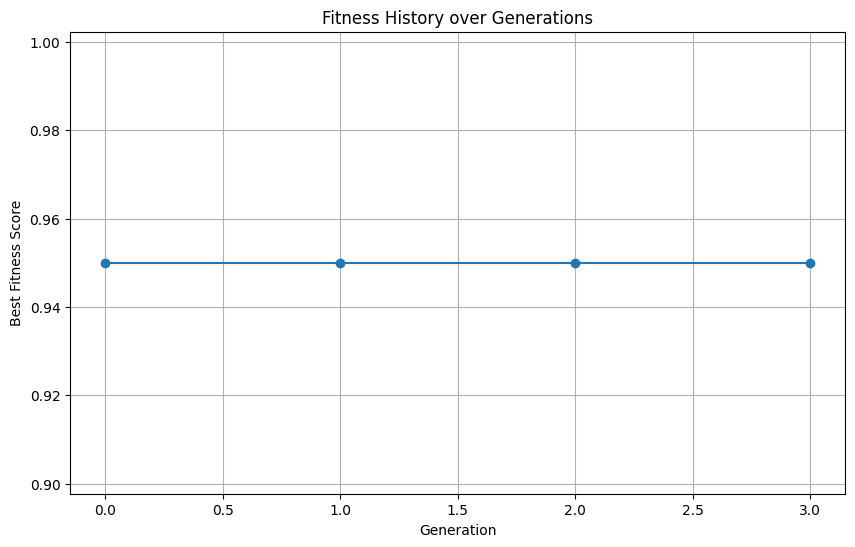

In [18]:
# Define parameter bounds
param_bounds = {
    'n_estimators': ('int', (10, 200)),
    'max_depth': ('int', (1, 20)),
    'min_samples_split': ('int', (2, 10)),
    'max_features': ('float', (0.5, 1.0)),
    'criterion': ('categorical', ['gini', 'entropy']),
    'bootstrap': ('categorical', [True, False])
}

# Initialize GeneticAlgorithmSearchCV
ga_search = GeneticAlgorithmSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_bounds=param_bounds,
    population_size=10,
    generations=5,
    crossover_rate=0.8,
    mutation_rate=0.2,
    selection_method='tournament',
    tournament_size=3,
    elitism=True,
    elitism_size=2,
    crossover_method='uniform',
    mutation_method='random',
    cv=5,
    scoring='accuracy',
    refit=True,
    verbose=2,
    random_state=42,
    convergence_criteria=4,
    n_jobs=-1
)

# Fit the model
ga_search.fit(X_train, y_train)

# Display the log of hyperparameters and their scores
print("\nHyperparameter Log:")
display(ga_search.display_log())

# Save the log to a CSV file
ga_search.save_log('ga_search_log.csv')

# Check best parameters and score
print("\nBest Parameters:", ga_search.best_params_)
print("Best Score:", ga_search.best_score_)

# Evaluate on the test set
test_score = ga_search.score(X_test, y_test)
print("\nGeneticAlgorithmSearchCV Test Set Score:", test_score)

# Plot fitness history
plt.figure(figsize=(10, 6))
plt.plot(ga_search.get_fitness_history(), marker='o')
plt.title('Fitness History over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Score')
plt.grid(True)
plt.show()

# SimulatedAnnealingSearchCV

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, BaseCrossValidator
from sklearn.metrics import get_scorer, check_scoring
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import (
    BaseEstimator, ClassifierMixin, RegressorMixin, clone
)
from sklearn.utils.validation import check_is_fitted
from joblib import Parallel, delayed
from typing import (
    Any, Callable, Dict, List, Optional, Union, Tuple
)
import copy
import math
import matplotlib.pyplot as plt

class SimulatedAnnealingSearchCV:
    def __init__(
        self,
        estimator: BaseEstimator,
        param_bounds: Dict[str, Union[
            Tuple[Union[int, float], Union[int, float]],
            List[Any]
        ]],
        initial_temperature: float = 1000.0,
        cooling_rate: float = 0.95,
        n_iter: int = 100,
        cv: Union[int, BaseCrossValidator] = 5,
        scoring: Optional[Union[str, Callable]] = None,
        refit: bool = True,
        verbose: int = 0,
        random_state: Optional[int] = None,
        perturbation_steps: int = 1,
        n_jobs: int = 1,
        tol: float = 1e-4,
    ) -> None:
        """
        Initialize the SimulatedAnnealingSearchCV.

        Parameters:
        - estimator: Estimator object.
        - param_bounds: Parameter bounds or choices.
        - initial_temperature: Starting temperature.
        - cooling_rate: Rate at which temperature decreases.
        - n_iter: Number of iterations.
        - cv: Cross-validation splitting strategy.
        - scoring: Scoring metric.
        - refit: Refit estimator with best params.
        - verbose: Verbosity level.
        - random_state: Random seed.
        - perturbation_steps: Steps to perturb parameters.
        - n_jobs: Number of jobs for parallel processing.
        - tol: Tolerance for considering delta == 0.
        """
        self.estimator = estimator
        self.param_bounds = param_bounds
        self.initial_temperature = initial_temperature
        self.cooling_rate = cooling_rate
        self.n_iter = n_iter
        self.cv = cv
        self.scoring = scoring
        self.refit = refit
        self.verbose = verbose
        self.random_state = random_state
        self.perturbation_steps = perturbation_steps
        self.n_jobs = n_jobs
        self.tol = tol

        self.rng = np.random.default_rng(random_state)
        self.cv_ = self._validate_cv(cv)
        self.scorer_ = check_scoring(estimator, scoring=scoring)
        self._determine_metric_direction()
        self.best_params_: Dict[str, Any] = {}
        self.best_score_: float = (
            -np.inf if self.maximize_ else np.inf
        )
        self.log_: List[Dict[str, Any]] = []

    def _validate_cv(
        self, cv: Union[int, BaseCrossValidator]
    ) -> BaseCrossValidator:
        """Validate the cross-validation strategy."""
        if isinstance(cv, int):
            return KFold(
                n_splits=cv, shuffle=True, random_state=self.random_state
            )
        elif isinstance(cv, BaseCrossValidator):
            return cv
        else:
            raise ValueError("Invalid cv parameter.")

    def _determine_metric_direction(self) -> None:
        """Determine if the metric should be maximized."""
        if hasattr(self.scorer_, '_sign'):
            self.maximize_ = self.scorer_._sign > 0
        else:
            # Default assumption for custom scorers
            self.maximize_ = False

    def _sample_initial_params(self) -> Dict[str, Any]:
        """Sample initial parameters from bounds or choices."""
        params = {}
        for param, bounds in self.param_bounds.items():
            if isinstance(bounds, list):
                params[param] = self.rng.choice(bounds)
            elif isinstance(bounds, tuple) and len(bounds) == 2:
                low, high = bounds
                if isinstance(low, int) and isinstance(high, int):
                    params[param] = self.rng.integers(low, high + 1)
                else:
                    params[param] = self.rng.uniform(low, high)
            else:
                raise ValueError(
                    f"Invalid bounds for parameter '{param}'."
                )
        return params

    def _perturb_params(
        self, current_params: Dict[str, Any]
    ) -> Dict[str, Any]:
        """Generate neighbor parameters by perturbation."""
        new_params = current_params.copy()
        params = list(new_params.keys())
        for _ in range(self.perturbation_steps):
            param = self.rng.choice(params)
            bounds = self.param_bounds[param]
            if isinstance(bounds, list):
                choices = bounds.copy()
                choices.remove(new_params[param])
                if choices:
                    new_params[param] = self.rng.choice(choices)
            elif isinstance(bounds, tuple) and len(bounds) == 2:
                low, high = bounds
                if isinstance(low, int) and isinstance(high, int):
                    step = max(1, (high - low) // 10)
                    delta = self.rng.integers(-step, step + 1)
                    new_value = int(new_params[param] + delta)
                    new_value = max(low, min(high, new_value))
                    new_params[param] = new_value
                else:
                    delta = (high - low) * 0.1
                    new_value = new_params[param] + self.rng.uniform(
                        -delta, delta
                    )
                    new_value = max(low, min(high, new_value))
                    new_params[param] = new_value
            else:
                raise ValueError(
                    f"Invalid bounds for parameter '{param}'."
                )
        return new_params

    def _evaluate(
        self, params: Dict[str, Any], X: np.ndarray, y: np.ndarray
    ) -> float:
        """Evaluate the cross-validated score for given parameters."""
        # Ensure integer parameters are integers
        for param, bounds in self.param_bounds.items():
            if (
                isinstance(bounds, tuple)
                and all(isinstance(b, int) for b in bounds)
            ):
                params[param] = int(round(params[param]))
            if isinstance(bounds, tuple):
                low, high = bounds
                params[param] = max(low, min(high, params[param]))

        model = clone(self.estimator).set_params(**params)

        scores = Parallel(n_jobs=self.n_jobs)(
            delayed(self._evaluate_on_fold)(
                clone(model), X, y, train_idx, val_idx
            )
            for train_idx, val_idx in self.cv_.split(X, y)
        )

        return np.mean(scores)

    def _evaluate_on_fold(
        self,
        model: BaseEstimator,
        X: np.ndarray,
        y: np.ndarray,
        train_idx: np.ndarray,
        val_idx: np.ndarray,
    ) -> float:
        """Evaluate model on a single fold."""
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model.fit(X_train, y_train)
        score = self.scorer_(model, X_val, y_val)
        return score

    def _acceptance_probability(
        self, delta: float, temperature: float
    ) -> float:
        """Calculate acceptance probability for worse solutions."""
        if temperature <= 0:
            return 0.0
        try:
            probability = math.exp(delta / temperature)
        except OverflowError:
            probability = 1.0 if delta > 0 else 0.0
        return probability

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'SimulatedAnnealingSearchCV':
        """Fit the estimator using simulated annealing."""
        X = np.asarray(X)
        y = np.asarray(y)
        self.best_params_ = self._sample_initial_params()
        self.best_score_ = self._evaluate(
            self.best_params_, X, y
        )
        self.log_.append(
            {**self.best_params_, 'score': self.best_score_}
        )
        current_params = self.best_params_
        current_score = self.best_score_
        temperature = self.initial_temperature

        if self.verbose > 0:
            print(f"Initial score: {self.best_score_:.6f}")

        for iteration in range(1, self.n_iter + 1):
            candidate_params = self._perturb_params(current_params)
            candidate_score = self._evaluate(
                candidate_params, X, y
            )

            delta = candidate_score - current_score if self.maximize_ \
                else current_score - candidate_score

            if delta > self.tol:
                accept = True
            else:
                acceptance_prob = self._acceptance_probability(
                    delta, temperature
                )
                accept = self.rng.random() < acceptance_prob

            if accept:
                current_params = candidate_params
                current_score = candidate_score
                self.log_.append(
                    {**current_params, 'score': current_score}
                )

                if (
                    (self.maximize_ and current_score > self.best_score_)
                    or (not self.maximize_ and current_score < self.best_score_)
                ):
                    self.best_params_ = current_params.copy()
                    self.best_score_ = current_score
                    new_best = True
                else:
                    new_best = False
            else:
                new_best = False

            if self.verbose > 0:
                print(f"Iteration {iteration}:")
                print(f"  Current Temperature: {temperature:.6f}")
                print(f"  Current Score: {current_score:.6f}")
                print(f"  Current Parameters: {current_params}")
                print(f"  Best Score So Far: {self.best_score_:.6f}")
                print(f"  Best Parameters So Far: {self.best_params_}")
                if new_best:
                    print("  New best score found!")
                print("-" * 50)

            temperature *= self.cooling_rate
            if temperature < 1e-8:
                if self.verbose > 0:
                    print("Temperature below threshold; stopping.")
                break

        if self.refit:
            if self.verbose > 0:
                print("Refitting on the full dataset...")
            self.best_estimator_ = clone(self.estimator).set_params(
                **self.best_params_
            )
            self.best_estimator_.fit(X, y)

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict using the best estimator."""
        check_is_fitted(self, 'best_estimator_')
        return self.best_estimator_.predict(X)

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Score the best estimator on the given test data."""
        check_is_fitted(self, 'best_estimator_')
        return self.scorer_(self.best_estimator_, X, y)

    def get_results(self) -> pd.DataFrame:
        """Return a DataFrame of the optimization log."""
        return pd.DataFrame(self.log_)

    def plot_optimization_log(self) -> None:
        """Plot the score over iterations."""
        log_df = self.get_results()
        plt.figure(figsize=(12, 6))
        plt.plot(
            range(len(log_df)), log_df['score'],
            marker='o', linestyle='-'
        )
        plt.title('Simulated Annealing Optimization')
        plt.xlabel('Iteration')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

Initial score: 0.941667
Iteration 1:
  Current Temperature: 1000.000000
  Current Score: 0.941667
  Current Parameters: {'n_estimators': 27, 'max_depth': 23, 'min_samples_split': 7, 'max_features': 0.9292989599556912, 'criterion': 'entropy', 'bootstrap': True}
  Best Score So Far: 0.941667
  Best Parameters So Far: {'n_estimators': 27, 'max_depth': 25, 'min_samples_split': 7, 'max_features': 0.9292989599556912, 'criterion': 'gini', 'bootstrap': True}
--------------------------------------------------
Iteration 2:
  Current Temperature: 950.000000
  Current Score: 0.941667
  Current Parameters: {'n_estimators': 27, 'max_depth': 23, 'min_samples_split': 7, 'max_features': 0.9292989599556912, 'criterion': 'entropy', 'bootstrap': True}
  Best Score So Far: 0.941667
  Best Parameters So Far: {'n_estimators': 27, 'max_depth': 25, 'min_samples_split': 7, 'max_features': 0.9292989599556912, 'criterion': 'gini', 'bootstrap': True}
--------------------------------------------------
Iteration 3:


,n_estimators,max_depth,min_samples_split,max_features,criterion,bootstrap,score
0,27,25,7,0.929299,gini,True,0.941667
1,27,23,7,0.929299,entropy,True,0.941667
2,27,23,7,0.929299,entropy,True,0.941667
3,27,23,7,0.924338,entropy,True,0.941667
4,27,23,8,0.956614,entropy,True,0.950000
5,27,23,7,0.929338,entropy,True,0.941667
6,27,24,7,0.962101,entropy,True,0.941667
7,27,24,6,0.962101,gini,True,0.941667
8,27,24,6,0.962101,entropy,False,0.933333
9,27,24,6,0.962101,gini,False,0.925000



Best Parameters:
  n_estimators: 27
  max_depth: 23
  min_samples_split: 8
  max_features: 0.956613715072331
  criterion: entropy
  bootstrap: True
Best Cross-Validated Score: 0.950000

Test Set Score: 1.000000


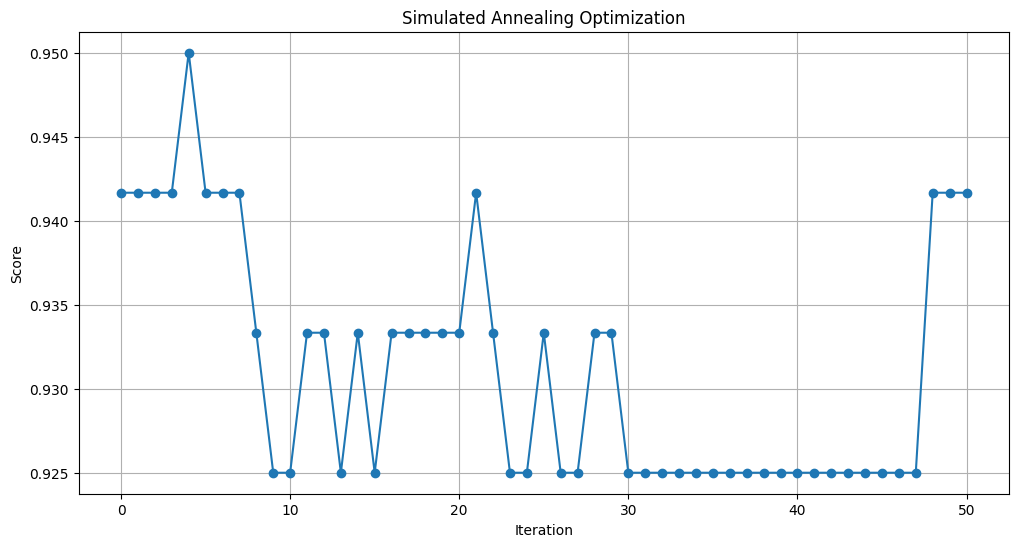

In [20]:
# Define parameter bounds
param_bounds = {
    'n_estimators': (10, 200),
    'max_depth': (5, 30),
    'min_samples_split': (2, 10),
    'max_features': (0.5, 1.0),
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
}

# Initialize SimulatedAnnealingSearchCV
sa_search = SimulatedAnnealingSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_bounds=param_bounds,
    initial_temperature=1000,
    cooling_rate=0.95,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    refit=True,
    verbose=1,
    random_state=42,
    perturbation_steps=2,
    n_jobs=-1,
    tol=1e-4
)

# Fit the model
sa_search.fit(X_train, y_train)

# Display the log of hyperparameters and their scores
print("\nHyperparameter Log:")
display(sa_search.get_results())

# Check best parameters and score
print("\nBest Parameters:")
for param, value in sa_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"Best Cross-Validated Score: {sa_search.best_score_:.6f}")

# Evaluate on the test set
test_score = sa_search.score(X_test, y_test)
print(f"\nTest Set Score: {test_score:.6f}")

# Plot the optimization process
sa_search.plot_optimization_log()

# ParticleSwarmSearchCV

In [21]:
import numpy as np
import pandas as pd
from typing import Any, Callable, Dict, List, Optional, Tuple, Union
from copy import deepcopy
import random
from sklearn.base import BaseEstimator, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, get_scorer
from sklearn.ensemble import RandomForestClassifier
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

class ParticleSwarmSearchCV:
    def __init__(
        self,
        estimator: BaseEstimator,
        param_space: Dict[str, Dict[str, Any]],
        n_particles: int = 30,
        n_iterations: int = 50,
        inertia_weight: float = 0.729,
        cognitive_coeff: float = 1.49445,
        social_coeff: float = 1.49445,
        velocity_clamp: Optional[Union[float, Tuple[float, float]]] = None,
        cv: Union[int, Any] = 5,
        scoring: Optional[Union[str, Callable]] = None,
        refit: bool = True,
        verbose: int = 0,
        random_state: Optional[int] = None,
        n_jobs: int = 1,
    ):
        """
        Initialize the ParticleSwarmSearchCV.

        Parameters:
        - estimator: scikit-learn estimator.
        - param_space: dict, hyperparameter space with 'type' and other keys.
        - n_particles: int, number of particles in the swarm.
        - n_iterations: int, number of iterations to run PSO.
        - inertia_weight: float, inertia weight (w) in velocity update.
        - cognitive_coeff: float, cognitive coefficient (c1).
        - social_coeff: float, social coefficient (c2).
        - velocity_clamp: float or tuple, limits for particle velocities.
        - cv: int or cross-validation generator.
        - scoring: str or callable, scoring function.
        - refit: bool, whether to refit the estimator with best params.
        - verbose: int, verbosity level.
        - random_state: int, random seed.
        - n_jobs: int, number of parallel jobs.
        """
        self.estimator = estimator
        self.param_space = param_space
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.inertia_weight = inertia_weight
        self.cognitive_coeff = cognitive_coeff
        self.social_coeff = social_coeff
        self.velocity_clamp = velocity_clamp
        self.refit = refit
        self.verbose = verbose
        self.random_state = random_state
        self.n_jobs = n_jobs

        if self.random_state is not None:
            np.random.seed(self.random_state)
            random.seed(self.random_state)

        self.cv = self._get_cv_object(cv)
        self.scoring = self._validate_scoring(scoring)

        # Initialize attributes that depend on scoring
        self.best_params_: Dict[str, Any] = {}
        self.best_score_: float = -np.inf if self._is_maximizing_metric() else np.inf
        self.log_: List[Dict[str, Any]] = []

        # Prepare parameter space
        self._prepare_parameter_space()

    def _get_cv_object(self, cv: Union[int, Any]) -> Any:
        """Get the cross-validation splitter."""
        if isinstance(cv, int):
            return KFold(n_splits=cv, shuffle=True, random_state=self.random_state)
        elif hasattr(cv, 'split'):
            return cv
        else:
            raise ValueError("cv must be an integer or an initialized cross-validation object")

    def _validate_scoring(self, scoring: Optional[Union[str, Callable]]) -> Optional[Callable]:
        """Validate and return the scoring function."""
        if scoring is None:
            return None  # Use default scorer in cross_val_score
        elif isinstance(scoring, str):
            scorer = get_scorer(scoring)
            return scorer
        elif callable(scoring):
            return scoring  # Must have signature scorer(estimator, X, y)
        else:
            raise ValueError("scoring must be a string or a callable")

    def _is_maximizing_metric(self) -> bool:
        """Determine if the scoring metric is to be maximized or minimized."""
        if self.scoring is None:
            # Use default scorer, which maximizes score for classifiers and regressors
            return True
        elif isinstance(self.scoring, str):
            maximizing_metrics = {
                'accuracy', 'f1', 'precision', 'recall', 'roc_auc', 'r2'
            }
            return self.scoring in maximizing_metrics
        elif hasattr(self.scoring, '_sign'):
            # scikit-learn scorers have _sign attribute: 1 for maximizing, -1 for minimizing
            return self.scoring._sign > 0
        else:
            # Assume custom scoring functions are to be maximized
            return True

    def _prepare_parameter_space(self):
        """Prepare the parameter space with bounds and types."""
        self.param_names: List[str] = []
        self.bounds: List[Tuple[float, float]] = []
        self.param_types: List[str] = []
        self.categorical_params: Dict[str, List[Any]] = {}

        for param, param_info in self.param_space.items():
            self.param_names.append(param)
            p_type = param_info['type']

            if p_type in ['int', 'float']:
                lower, upper = param_info['bounds']
                self.bounds.append((float(lower), float(upper)))
                self.param_types.append(p_type)
            elif p_type == 'categorical':
                categories = param_info['categories']
                self.categorical_params[param] = categories
                # Represent categories as indices in the position vector
                self.bounds.append((0, len(categories) - 1))
                self.param_types.append(p_type)
            else:
                raise ValueError(f"Parameter '{param}' type must be 'int', 'float', or 'categorical'.")

    def _initialize_particles(self):
        """Initialize particles with random positions and velocities."""
        self.dimensions = len(self.param_names)
        self.positions = np.random.uniform(0, 1, (self.n_particles, self.dimensions))
        self.velocities = np.random.uniform(-0.1, 0.1, (self.n_particles, self.dimensions))
        self.p_best_positions = deepcopy(self.positions)
        self.p_best_scores = np.array(
            [-np.inf if self._is_maximizing_metric() else np.inf] * self.n_particles
        )
        self.g_best_position = None
        self.g_best_score = -np.inf if self._is_maximizing_metric() else np.inf

    def _map_position_to_params(self, position: np.ndarray) -> Dict[str, Any]:
        """Map normalized position to actual parameter values."""
        params: Dict[str, Any] = {}
        for i, param in enumerate(self.param_names):
            if self.param_types[i] in ['int', 'float']:
                lower, upper = self.bounds[i]
                value = lower + position[i] * (upper - lower)
                if self.param_types[i] == 'int':
                    value = int(round(value))
                params[param] = value
            elif self.param_types[i] == 'categorical':
                categories = self.categorical_params[param]
                index = int(round(position[i] * (len(categories) - 1)))
                index = min(max(index, 0), len(categories) - 1)
                params[param] = categories[index]
        return params

    def _update_velocity(self, particle_idx: int):
        """Update velocity for a single particle."""
        r1 = np.random.uniform(size=self.dimensions)
        r2 = np.random.uniform(size=self.dimensions)
        cognitive_velocity = (
            self.cognitive_coeff * r1 * (self.p_best_positions[particle_idx] - self.positions[particle_idx])
        )
        social_velocity = (
            self.social_coeff * r2 * (self.g_best_position - self.positions[particle_idx])
        )
        new_velocity = (
            self.inertia_weight * self.velocities[particle_idx]
            + cognitive_velocity
            + social_velocity
        )

        # Apply velocity clamping
        if self.velocity_clamp is not None:
            if isinstance(self.velocity_clamp, (int, float)):
                new_velocity = np.clip(new_velocity, -self.velocity_clamp, self.velocity_clamp)
            elif isinstance(self.velocity_clamp, (tuple, list)) and len(self.velocity_clamp) == 2:
                new_velocity = np.clip(new_velocity, self.velocity_clamp[0], self.velocity_clamp[1])
            else:
                raise ValueError("velocity_clamp must be a float or a tuple/list of two floats.")

        self.velocities[particle_idx] = new_velocity

    def _update_position(self, particle_idx: int):
        """Update position for a single particle."""
        new_position = self.positions[particle_idx] + self.velocities[particle_idx]
        # Ensure positions are within [0,1]
        new_position = np.clip(new_position, 0, 1)
        self.positions[particle_idx] = new_position

    def _evaluate_fitness(self, params: Dict[str, Any], X: np.ndarray, y: np.ndarray) -> float:
        """Evaluate fitness of a parameter set using cross-validation."""
        model = clone(self.estimator)
        model.set_params(**params)

        scores = cross_val_score(
            model, X, y, cv=self.cv, scoring=self.scoring, n_jobs=self.n_jobs
        )

        avg_score = np.mean(scores)
        return avg_score

    def fit(self, X: np.ndarray, y: np.ndarray):
        """Perform Particle Swarm Optimization to find the best hyperparameters."""
        self._initialize_particles()

        for iteration in range(self.n_iterations):
            if self.verbose >= 1:
                print(f"Iteration {iteration + 1}/{self.n_iterations}:")

            for i in range(self.n_particles):
                params = self._map_position_to_params(self.positions[i])
                score = self._evaluate_fitness(params, X, y)

                # Update personal best
                if (self._is_maximizing_metric() and score > self.p_best_scores[i]) or \
                   (not self._is_maximizing_metric() and score < self.p_best_scores[i]):
                    self.p_best_scores[i] = score
                    self.p_best_positions[i] = self.positions[i].copy()

                # Update global best
                if (self._is_maximizing_metric() and score > self.g_best_score) or \
                   (not self._is_maximizing_metric() and score < self.g_best_score):
                    self.g_best_score = score
                    self.g_best_position = self.positions[i].copy()
                    self.best_params_ = params.copy()
                    if self.verbose >= 2:
                        print(f"  New Best Score: {self.g_best_score:.4f}")
                        print(f"  Best Parameters: {self.best_params_}")

                # Log the parameters and score
                self._log_hyperparameters(params, score, iteration=iteration+1, particle_idx=i+1)

                if self.verbose >= 3:
                    print(f"  Particle {i + 1}: Score = {score:.4f}, Params = {params}")

            if self.verbose >= 1:
                print(f"  Best Score This Iteration: {self.g_best_score:.4f}")
                if self.verbose >= 2:
                    print(f"  Best Parameters So Far: {self.best_params_}")
                print()

            # Update velocities and positions
            for i in range(self.n_particles):
                self._update_velocity(i)
                self._update_position(i)

        # After all iterations, set the best parameters
        self.best_params_ = self._map_position_to_params(self.g_best_position)
        self.best_score_ = self.g_best_score

        # Refit the estimator with the best parameters on the full dataset
        if self.refit:
            if self.verbose > 0:
                print("\nRefitting the best estimator on the full dataset...\n")
            self.estimator.set_params(**self.best_params_)
            self.estimator.fit(X, y)

        return self

    def _log_hyperparameters(self, params: Dict[str, Any], score: float, iteration: int, particle_idx: int):
        """Log each hyperparameter combination and its score."""
        log_entry = params.copy()
        log_entry['score'] = score
        log_entry['iteration'] = iteration
        log_entry['particle'] = particle_idx
        self.log_.append(log_entry)

    def display_log(self) -> pd.DataFrame:
        """Display the log of hyperparameters and their corresponding scores as a DataFrame."""
        return pd.DataFrame(self.log_)

    def save_log(self, filepath: str = 'pso_search_log.csv'):
        """Save the hyperparameter log to a CSV file."""
        pd.DataFrame(self.log_).to_csv(filepath, index=False)
        if self.verbose > 0:
            print(f"Hyperparameter log saved to {filepath}")

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Score the refitted estimator on the provided data."""
        if self.scoring is None:
            # Use the estimator's default score method
            return self.estimator.score(X, y)
        else:
            return self.scoring(self.estimator, X, y)

    def get_best_params(self) -> Dict[str, Any]:
        """Get the best hyperparameters found by PSO."""
        return self.best_params_

    def get_best_score(self) -> float:
        """Get the best score achieved by PSO."""
        return self.best_score_

    def get_log(self) -> pd.DataFrame:
        """Alias for display_log."""
        return self.display_log()

    def plot_convergence(self):
        """Plot the best score achieved in each iteration."""
        iteration_best: List[float] = []
        best_so_far = -np.inf if self._is_maximizing_metric() else np.inf

        for i in range(self.n_iterations):
            iteration_entries = [
                entry for entry in self.log_ if entry['iteration'] == i + 1
            ]
            iteration_scores = [entry['score'] for entry in iteration_entries]
            if self._is_maximizing_metric():
                best_so_far = max(best_so_far, max(iteration_scores))
            else:
                best_so_far = min(best_so_far, min(iteration_scores))
            iteration_best.append(best_so_far)

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, self.n_iterations + 1), iteration_best, marker='o')
        plt.xlabel('Iteration')
        plt.ylabel('Best Score So Far')
        plt.title('PSO Convergence')
        plt.grid(True)
        plt.show()

Iteration 1/5:
  New Best Score: 0.9417
  Best Parameters: {'n_estimators': 81, 'max_depth': 19, 'min_samples_split': 15, 'max_features': 0.6387926357773329, 'criterion': 'gini', 'bootstrap': True}
  New Best Score: 0.9500
  Best Parameters: {'n_estimators': 21, 'max_depth': 17, 'min_samples_split': 13, 'max_features': 0.737265320016441, 'criterion': 'gini', 'bootstrap': False}
  Best Score This Iteration: 0.9500
  Best Parameters So Far: {'n_estimators': 21, 'max_depth': 17, 'min_samples_split': 13, 'max_features': 0.737265320016441, 'criterion': 'gini', 'bootstrap': False}

Iteration 2/5:
  Best Score This Iteration: 0.9500
  Best Parameters So Far: {'n_estimators': 21, 'max_depth': 17, 'min_samples_split': 13, 'max_features': 0.737265320016441, 'criterion': 'gini', 'bootstrap': False}

Iteration 3/5:
  Best Score This Iteration: 0.9500
  Best Parameters So Far: {'n_estimators': 21, 'max_depth': 17, 'min_samples_split': 13, 'max_features': 0.737265320016441, 'criterion': 'gini', 'boo

,n_estimators,max_depth,min_samples_split,max_features,criterion,bootstrap,score,iteration,particle
0,81,19,15,0.638793,gini,True,0.941667,1,1
1,21,17,13,0.737265,gini,False,0.950000,1,2
2,168,5,5,0.265064,entropy,False,0.933333,1,3
3,92,7,13,0.225544,entropy,True,0.925000,1,4
4,97,16,6,0.562811,entropy,True,0.941667,1,5
5,71,16,14,0.842928,gini,True,0.950000,2,1
6,16,16,13,0.729412,gini,False,0.933333,2,2
7,129,19,13,0.682473,gini,False,0.941667,2,3
8,60,14,14,0.452291,gini,False,0.941667,2,4
9,28,19,13,0.571559,gini,False,0.950000,2,5


Hyperparameter log saved to rf_pso_search_log.csv

Best Parameters: {'n_estimators': 21, 'max_depth': 17, 'min_samples_split': 13, 'max_features': 0.737265320016441, 'criterion': 'gini', 'bootstrap': False}
Best Score: 0.9499999999999998


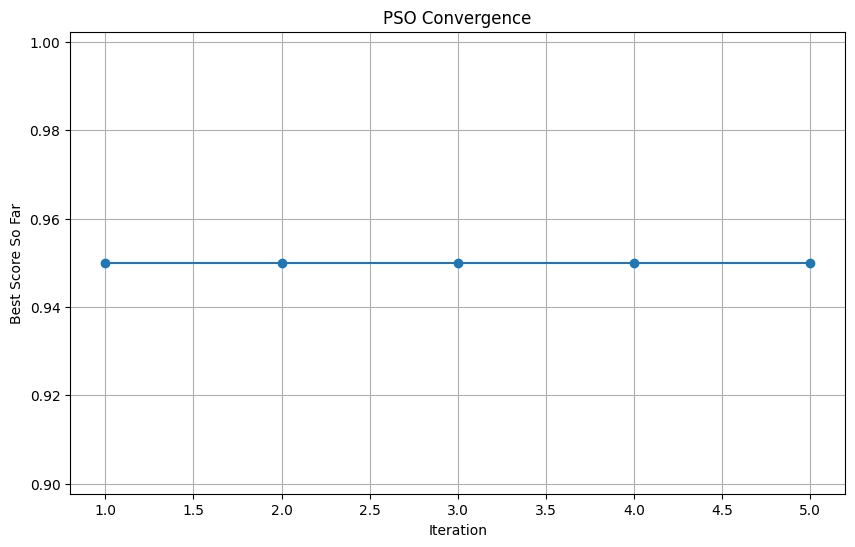


ParticleSwarmSearchCV Test Set Score: 1.0


In [22]:
# Define the hyperparameter space
param_space = {
    'n_estimators': {
        'type': 'int',
        'bounds': (10, 200)
    },
    'max_depth': {
        'type': 'int',
        'bounds': (1, 20)
    },
    'min_samples_split': {
        'type': 'int',
        'bounds': (2, 20)
    },
    'max_features': {
        'type': 'float',
        'bounds': (0.1, 1.0)
    },
    'criterion': {
        'type': 'categorical',
        'categories': ['gini', 'entropy', 'log_loss']
    },
    'bootstrap': {
        'type': 'categorical',
        'categories': [True, False]
    },
}

# Initialize ParticleSwarmSearchCV with increased verbosity
pso_search = ParticleSwarmSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_space=param_space,
    n_particles=5,
    n_iterations=5,
    inertia_weight=0.729,
    cognitive_coeff=1.49445,
    social_coeff=1.49445,
    cv=3,
    scoring='accuracy',
    refit=True,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
pso_search.fit(X_train, y_train)

# Display the log of hyperparameters and their scores
display(pso_search.display_log())

# Save the log to a CSV file
pso_search.save_log('rf_pso_search_log.csv')

# Check best parameters and score
print("\nBest Parameters:", pso_search.get_best_params())
print("Best Score:", pso_search.get_best_score())

# Plot convergence
pso_search.plot_convergence()

# Evaluate on the test set
test_score = pso_search.score(X_test, y_test)
print("\nParticleSwarmSearchCV Test Set Score:", test_score)

# DifferentialEvolutionSearchCV

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import get_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from sklearn.utils.validation import check_random_state
from joblib import Parallel, delayed
from multiprocessing import cpu_count
from typing import Any, Callable, Dict, List, Tuple, Union, Optional
import matplotlib.pyplot as plt

class DifferentialEvolutionSearchCV:
    """
    Differential Evolution algorithm for hyperparameter optimization with cross-validation.

    Parameters
    ----------
    estimator : estimator object
        The object to use to fit the data.

    param_bounds : dict
        Dictionary with parameter names as keys and parameter bounds as values.
        The bounds should be specified as:
        {
            'param_name': {
                'type': 'int' or 'float' or 'categorical',
                'bounds': (lower, upper),        # For 'int' and 'float' types
                'values': [list of categories],  # For 'categorical' type
            }
        }

    population_size : int, default=20
        Number of individuals in the population.

    generations : int, default=50
        Number of generations to evolve.

    mutation_strategy : str, default='rand/1'
        Mutation strategy to use ('rand/1' or 'best/1').

    F : float, default=0.8
        Differential weight, controls the amplification of the differential variation.

    CR : float, default=0.9
        Crossover probability.

    cv : int or cross-validation generator, default=5
        Determines the cross-validation splitting strategy.

    scoring : str or callable, default='accuracy'
        A single str or a callable to evaluate the predictions on the test set.

    refit : bool, default=True
        Refit the estimator using the best found parameters on the whole dataset.

    verbose : int, default=1
        Controls the verbosity.

    random_state : int, RandomState instance or None, default=None
        Controls the randomness of the algorithm.

    tol : float, default=1e-6
        Tolerance for early stopping.

    patience : int, default=5
        Number of generations with no improvement to wait before early stopping.

    n_jobs : int, default=1
        Number of jobs to run in parallel. -1 means using all processors.
    """

    def __init__(
        self,
        estimator: Any,
        param_bounds: Dict[str, Dict[str, Any]],
        population_size: int = 20,
        generations: int = 50,
        mutation_strategy: str = 'rand/1',
        F: float = 0.8,
        CR: float = 0.9,
        cv: Union[int, KFold] = 5,
        scoring: Union[str, Callable[[Any, Any], float]] = 'accuracy',
        refit: bool = True,
        verbose: int = 1,
        random_state: Optional[Union[int, np.random.RandomState]] = None,
        tol: float = 1e-6,
        patience: int = 5,
        n_jobs: int = 1,
    ):
        self.estimator = estimator
        self.param_bounds = param_bounds
        self.population_size = population_size
        self.generations = generations
        self.mutation_strategy = mutation_strategy
        self.F = F
        self.CR = CR
        self.cv = cv
        self.scoring = scoring
        self.refit = refit
        self.verbose = verbose
        self.random_state = random_state
        self.tol = tol
        self.patience = patience
        self.n_jobs = n_jobs if n_jobs != -1 else cpu_count()

        # Set random state
        self._rng = check_random_state(self.random_state)

        # Initialize logging and tracking attributes
        self.best_params_: Optional[Dict[str, Any]] = None
        self.best_score_: Optional[float] = None
        self.best_estimator_: Optional[Any] = None
        self.convergence_history_: List[float] = []
        self.log_: List[Dict[str, Any]] = []

        # Parse parameter bounds and setup internal structures
        self._parse_param_bounds()

        # Validate scoring
        self._validate_scoring()

        # Setup cross-validation object
        self._setup_cv()

    def _parse_param_bounds(self):
        """Parse parameter bounds and set up internal data structures."""
        self.param_names: List[str] = []
        self.param_types: List[str] = []
        self.param_bounds_list: List[Tuple[float, float]] = []
        self.param_categories: List[Optional[List[Any]]] = []

        for param_name, param_info in self.param_bounds.items():
            self.param_names.append(param_name)
            param_type = param_info.get('type')
            self.param_types.append(param_type)

            if param_type == 'int':
                bounds = param_info.get('bounds')
                if not bounds or len(bounds) != 2:
                    raise ValueError(
                        f"Integer parameter '{param_name}' must have 'bounds' as a tuple of two values."
                    )
                self.param_bounds_list.append((bounds[0], bounds[1]))
                self.param_categories.append(None)
            elif param_type == 'float':
                bounds = param_info.get('bounds')
                if not bounds or len(bounds) != 2:
                    raise ValueError(
                        f"Float parameter '{param_name}' must have 'bounds' as a tuple of two values."
                    )
                self.param_bounds_list.append((bounds[0], bounds[1]))
                self.param_categories.append(None)
            elif param_type == 'categorical':
                categories = param_info.get('values')
                if not categories or not isinstance(categories, list):
                    raise ValueError(
                        f"Categorical parameter '{param_name}' must have 'values' as a list."
                    )
                self.param_bounds_list.append((0, len(categories) - 1))
                self.param_categories.append(categories)
            else:
                raise ValueError(f"Unsupported parameter type: {param_type}")

        self.dimensions = len(self.param_names)

    def _validate_scoring(self):
        """Validate the scoring parameter and set optimization direction."""
        if self.scoring is None:
            self.scorer = get_scorer('accuracy')
            self.greater_is_better = True
        elif isinstance(self.scoring, str):
            self.scorer = get_scorer(self.scoring)
            self.greater_is_better = self.scorer._sign > 0
        elif callable(self.scoring):
            self.scorer = self.scoring
            self.greater_is_better = True  # Assume maximization
        else:
            raise ValueError("Scoring must be None, a string, or a callable.")

    def _setup_cv(self):
        """Set up the cross-validation strategy."""
        if isinstance(self.cv, int):
            self.cv = KFold(
                n_splits=self.cv, shuffle=True, random_state=self.random_state
            )
        elif not hasattr(self.cv, 'split'):
            raise ValueError("cv must be an integer or a cross-validation object.")

    def _initialize_population(self) -> np.ndarray:
        """Initialize the population of parameter combinations using bounds."""
        population = []
        for _ in range(self.population_size):
            individual = []
            for i in range(self.dimensions):
                param_type = self.param_types[i]
                low, high = self.param_bounds_list[i]

                if param_type == 'categorical':
                    val = self._rng.randint(low, high + 1)
                elif param_type == 'int':
                    val = self._rng.randint(low, high + 1)
                elif param_type == 'float':
                    val = self._rng.uniform(low, high)
                else:
                    raise ValueError(f"Unsupported parameter type: {param_type}")

                individual.append(val)
            population.append(np.array(individual))
        return np.array(population)

    def _vector_to_params(self, vector: np.ndarray) -> Dict[str, Any]:
        """Convert a DE vector to a hyperparameter dictionary."""
        params = {}
        for i, param_name in enumerate(self.param_names):
            param_type = self.param_types[i]
            val = vector[i]

            if param_type == 'categorical':
                categories = self.param_categories[i]
                idx = int(np.clip(round(val), 0, len(categories) - 1))
                params[param_name] = categories[idx]
            elif param_type == 'int':
                low, high = self.param_bounds_list[i]
                val = int(round(np.clip(val, low, high)))
                params[param_name] = val
            elif param_type == 'float':
                low, high = self.param_bounds_list[i]
                val = float(np.clip(val, low, high))
                params[param_name] = val
            else:
                raise ValueError(f"Unsupported parameter type: {param_type}")
        return params

    def _mutate(self, population: np.ndarray, idx: int, best_idx: int) -> np.ndarray:
        """Perform mutation to generate a mutant vector."""
        idxs = [i for i in range(self.population_size) if i != idx]
        a, b, c = population[self._rng.choice(idxs, 3, replace=False)]

        if self.mutation_strategy == 'rand/1':
            mutant = a + self.F * (b - c)
        elif self.mutation_strategy == 'best/1':
            best = population[best_idx]
            mutant = best + self.F * (a - b)
        else:
            raise ValueError(f"Unsupported mutation strategy: {self.mutation_strategy}")

        return mutant

    def _crossover(self, target: np.ndarray, mutant: np.ndarray) -> np.ndarray:
        """Perform crossover between target and mutant vectors."""
        trial = np.copy(target)
        j_rand = self._rng.randint(self.dimensions)
        for j in range(self.dimensions):
            if self._rng.rand() < self.CR or j == j_rand:
                trial[j] = mutant[j]
        return trial

    def _clip(self, vector: np.ndarray) -> np.ndarray:
        """Ensure the vector is within bounds."""
        clipped = []
        for i in range(self.dimensions):
            param_type = self.param_types[i]
            low, high = self.param_bounds_list[i]
            val = vector[i]
            val = np.clip(val, low, high)
            clipped.append(val)
        return np.array(clipped)

    def _evaluate_fitness(
        self, individual: np.ndarray, X: np.ndarray, y: np.ndarray, gen: int, idx: int
    ) -> Tuple[float, Dict[str, Any]]:
        """Evaluate fitness using cross-validation."""
        params = self._vector_to_params(individual)
        estimator = clone(self.estimator)
        estimator.set_params(**params)

        # Perform cross-validation
        scores = cross_val_score(
            estimator, X, y, cv=self.cv, scoring=self.scorer, n_jobs=1
        )
        mean_score = np.mean(scores)

        # Flatten the params dictionary and include additional info
        log_entry = {**params}
        log_entry['score'] = mean_score
        log_entry['generation'] = gen + 1  # Generations start from 1
        log_entry['individual'] = idx + 1  # Indices start from 1

        return mean_score, log_entry

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'DifferentialEvolutionSearchCV':
        """
        Fit the model using Differential Evolution to optimize hyperparameters.
        """
        # Initialize population
        population = self._initialize_population()

        # Evaluate initial population
        if self.verbose > 0:
            print("Evaluating initial population...")
        fitness_logs = Parallel(n_jobs=self.n_jobs)(
            delayed(self._evaluate_fitness)(population[i], X, y, 0, i)
            for i in range(self.population_size)
        )

        fitness = []
        logs = []
        for fit, log in fitness_logs:
            fitness.append(fit)
            logs.append(log)
        fitness = np.array(fitness)
        self.log_.extend(logs)

        # Determine initial best
        if self.greater_is_better:
            best_idx = np.argmax(fitness)
            self.best_score_ = fitness[best_idx]
        else:
            best_idx = np.argmin(fitness)
            self.best_score_ = fitness[best_idx]

        self.best_params_ = self._vector_to_params(population[best_idx])

        if self.verbose > 0:
            print(
                f"Initial best score: {self.best_score_:.6f} with params: {self.best_params_}"
            )

        prev_best_score = self.best_score_
        no_improvement_generations = 0

        # Evolution loop
        for gen in range(self.generations):
            if self.verbose > 0:
                print(f"\nGeneration {gen + 1}/{self.generations}")

            # For each individual in the population
            results = Parallel(n_jobs=self.n_jobs)(
                delayed(self._evolve_individual)(
                    population, fitness, i, best_idx, X, y, gen, i
                )
                for i in range(self.population_size)
            )

            new_population = []
            new_fitness = []
            logs = []

            for individual, fitness_i, log_data in results:
                new_population.append(individual)
                new_fitness.append(fitness_i)
                logs.append(log_data)

                # Update best individual
                if (self.greater_is_better and fitness_i > self.best_score_) or (
                    not self.greater_is_better and fitness_i < self.best_score_
                ):
                    self.best_score_ = fitness_i
                    self.best_params_ = self._vector_to_params(individual)
                    best_idx = new_population.index(individual)
                    if self.verbose > 0:
                        print(
                            f"  New best score: {self.best_score_:.6f} with params: {self.best_params_}"
                        )

            population = np.array(new_population)
            fitness = np.array(new_fitness)
            self.convergence_history_.append(self.best_score_)
            self.log_.extend(logs)

            # Early stopping check
            improvement = abs(self.best_score_ - prev_best_score)
            if self.verbose > 1:
                print(f"  Best score this generation: {self.best_score_:.6f}")
                print(f"  Improvement: {improvement:.6f}")

            if improvement < self.tol:
                no_improvement_generations += 1
                if no_improvement_generations >= self.patience:
                    if self.verbose > 0:
                        print(
                            f"Early stopping: No improvement in the last {self.patience} generations."
                        )
                    break
            else:
                no_improvement_generations = 0

            prev_best_score = self.best_score_

        # Refit the best estimator on the full dataset
        if self.refit:
            if self.verbose > 0:
                print("\nRefitting the best estimator on the full dataset...")
            self.best_estimator_ = clone(self.estimator).set_params(**self.best_params_)
            self.best_estimator_.fit(X, y)

        return self

    def _evolve_individual(
        self,
        population: np.ndarray,
        fitness: np.ndarray,
        idx: int,
        best_idx: int,
        X: np.ndarray,
        y: np.ndarray,
        gen: int,
        individual_idx: int,
    ) -> Tuple[np.ndarray, float, Dict[str, Any]]:
        """Evolve an individual and evaluate its fitness."""
        target = population[idx]
        mutant = self._mutate(population, idx, best_idx)
        mutant = self._clip(mutant)
        trial = self._crossover(target, mutant)
        trial = self._clip(trial)

        # Evaluate trial individual
        trial_fitness, log_data = self._evaluate_fitness(trial, X, y, gen, individual_idx)

        # Selection
        if (self.greater_is_better and trial_fitness > fitness[idx]) or (
            not self.greater_is_better and trial_fitness < fitness[idx]
        ):
            return trial, trial_fitness, log_data
        else:
            # Log the target individual
            target_params = self._vector_to_params(target)
            log_data = {**target_params}
            log_data['score'] = fitness[idx]
            log_data['generation'] = gen + 1
            log_data['individual'] = individual_idx + 1
            return target, fitness[idx], log_data

    def predict(self, X: np.ndarray) -> Any:
        """
        Predict using the best estimator.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Samples.

        Returns
        -------
        y_pred : array-like of shape (n_samples,)
            Predicted values.
        """
        if not hasattr(self, 'best_estimator_'):
            raise ValueError("Estimator not fitted yet. Call 'fit' before using this method.")
        return self.best_estimator_.predict(X)

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Return the score on the given data, using the scoring function.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,)
            True labels for X.

        Returns
        -------
        score : float
            Score of the best estimator.
        """
        if not hasattr(self, 'best_estimator_'):
            raise ValueError("Estimator not fitted yet. Call 'fit' before using this method.")

        return self.scorer(self.best_estimator_, X, y)

    def display_log(self) -> pd.DataFrame:
        """
        Display the log of hyperparameters and their scores.

        Returns
        -------
        log_df : pandas.DataFrame
            DataFrame containing the hyperparameters and their corresponding scores.
        """
        return pd.DataFrame(self.log_)

    def save_log(self, filepath: str = 'de_search_log.csv'):
        """
        Save the hyperparameter log to a CSV file.

        Parameters
        ----------
        filepath : str, default='de_search_log.csv'
            Path to save the CSV file.
        """
        log_df = self.display_log()
        log_df.to_csv(filepath, index=False)
        if self.verbose > 0:
            print(f"Hyperparameter log saved to {filepath}")

    def plot_convergence(self):
        """
        Plot the convergence of the best score over generations.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.convergence_history_) + 1), self.convergence_history_, marker='o')
        plt.title('Convergence over Generations')
        plt.xlabel('Generation')
        plt.ylabel('Best Score')
        plt.xticks(range(1, len(self.convergence_history_) + 1))
        plt.grid(True)
        plt.show()

Evaluating initial population...
Initial best score: 0.950000 with params: {'n_estimators': 237, 'max_depth': 11, 'min_samples_split': 9, 'bootstrap': True, 'criterion': 'gini', 'max_features': 0.9183883618709039}

Generation 1/5
  Best score this generation: 0.950000
  Improvement: 0.000000

Generation 2/5
  Best score this generation: 0.950000
  Improvement: 0.000000

Generation 3/5
  Best score this generation: 0.950000
  Improvement: 0.000000
Early stopping: No improvement in the last 3 generations.

Refitting the best estimator on the full dataset...

Best Parameters: {'n_estimators': 237, 'max_depth': 11, 'min_samples_split': 9, 'bootstrap': True, 'criterion': 'gini', 'max_features': 0.9183883618709039}
Best Score: 0.9500

DifferentialEvolutionSearchCV Test Set Score: 1.0000

Hyperparameter Optimization Log:


,n_estimators,max_depth,min_samples_split,bootstrap,criterion,max_features,score,generation,individual
0,152,33,9,True,gini,0.240417,0.933333,1,1
1,260,27,9,True,entropy,0.228580,0.933333,1,2
2,180,26,6,False,entropy,0.849198,0.925000,1,3
3,87,6,6,True,entropy,0.650488,0.941667,1,4
4,285,29,2,True,gini,0.459875,0.925000,1,5
5,269,20,4,False,gini,0.984908,0.941667,1,6
6,298,7,6,True,gini,0.253472,0.925000,1,7
7,216,22,5,True,entropy,0.606959,0.933333,1,8
8,299,13,6,False,entropy,0.316923,0.925000,1,9
9,237,11,9,True,gini,0.918388,0.950000,1,10


Hyperparameter log saved to de_search_log.csv


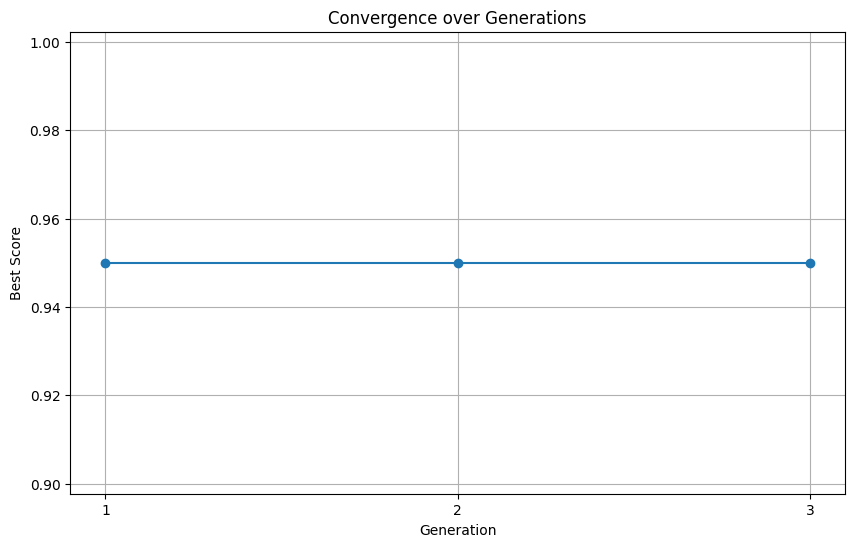

In [24]:
# Define parameter bounds
param_bounds = {
    'n_estimators': {'type': 'int', 'bounds': (50, 300)},
    'max_depth': {'type': 'int', 'bounds': (5, 50)},
    'min_samples_split': {'type': 'int', 'bounds': (2, 10)},
    'bootstrap': {'type': 'categorical', 'values': [True, False]},
    'criterion': {'type': 'categorical', 'values': ['gini', 'entropy']},
    'max_features': {'type': 'float', 'bounds': (0.1, 1.0)},
}

# Initialize DifferentialEvolutionSearchCV
de_search = DifferentialEvolutionSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_bounds=param_bounds,
    population_size=10,
    generations=5,
    mutation_strategy='rand/1',
    F=0.8,
    CR=0.9,
    cv=3,
    scoring='accuracy',
    refit=True,
    verbose=2,
    random_state=42,
    tol=1e-4,
    patience=3,
    n_jobs=-1,
)

# Fit the model
de_search.fit(X_train, y_train)

# Display best parameters and score
print(f"\nBest Parameters: {de_search.best_params_}")
print(f"Best Score: {de_search.best_score_:.4f}")

# Score on test set
test_score = de_search.score(X_test, y_test)
print(f"\nDifferentialEvolutionSearchCV Test Set Score: {test_score:.4f}")

# Display the log of hyperparameters and scores
print("\nHyperparameter Optimization Log:")
display(de_search.display_log())

# Save the log to a CSV file
de_search.save_log('de_search_log.csv')

# Plot convergence
de_search.plot_convergence()

# OptunaBayesianSearchCV

In [25]:
!pip install -q optuna

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import get_scorer, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from joblib import Parallel, delayed
from typing import Any, Callable, Dict, List, Optional, Union
import scipy
from scipy.stats import randint, uniform
import warnings

class OptunaBayesianSearchCV:
    """
    Hyperparameter tuning using Optuna's Bayesian Optimization, similar to sklearn's GridSearchCV.

    Parameters
    ----------
    estimator : estimator object
        The object to use to fit the data.
    param_distributions : dict
        Dictionary with parameter names (`str`) as keys and distributions or lists of parameters to try.
    n_trials : int, default=10
        Number of parameter settings that are sampled.
    cv : int or cross-validation generator, default=5
        Determines the cross-validation splitting strategy.
    scoring : str or callable, default=None
        A string or a scorer callable object/function with signature `scorer(estimator, X, y)`.
        If None, the estimator's default scorer is used.
    refit : bool, default=True
        Refit an estimator using the best found parameters on the whole dataset.
    verbose : int, default=0
        Controls the verbosity: the higher, the more messages.
    random_state : Optional[int], default=None
        Pseudo random number generator state used for random uniform sampling.
    sampler : Optional[optuna.samplers.BaseSampler], default=None
        Sampler used for the optimization process.
    pruner : Optional[optuna.pruners.BasePruner], default=None
        Pruner used to halt unpromising trials.
    n_jobs : int, default=1
        Number of jobs to run in parallel. `-1` means using all processors.

    Attributes
    ----------
    best_params_ : dict
        Parameter setting that gave the best results on the hold out data.
    best_score_ : float
        Mean cross-validated score of the best_estimator.
    study_ : optuna.study.Study
        The Optuna study object after optimization.
    results_ : List[Dict[str, Any]]
        List of all trial results with their parameters and scores.
    log_ : List[Dict[str, Any]]
        Log of hyperparameters and their corresponding scores.
    """

    def __init__(
        self,
        estimator: Any,
        param_distributions: Dict[str, Any],
        n_trials: int = 10,
        cv: Union[int, Any] = 5,
        scoring: Optional[Union[str, Callable]] = None,
        refit: bool = True,
        verbose: int = 0,
        random_state: Optional[int] = None,
        sampler: Optional[optuna.samplers.BaseSampler] = None,
        pruner: Optional[optuna.pruners.BasePruner] = None,
        n_jobs: int = 1,
    ) -> None:
        self.estimator = estimator
        self.param_distributions = param_distributions
        self.n_trials = n_trials
        self.random_state = random_state
        self.cv = self._get_cv(cv)
        self.scorer = self._get_scorer(scoring)
        self.refit = refit
        self.verbose = verbose
        self.n_jobs = n_jobs

        self.best_params_: Optional[Dict[str, Any]] = None
        self.best_score_: Optional[float] = None
        self.study_: Optional[optuna.Study] = None
        self.results_: List[Dict[str, Any]] = []
        self.log_: List[Dict[str, Any]] = []

        self.sampler = sampler if sampler else TPESampler(seed=self.random_state)
        self.pruner = pruner

        self._maximize = self._is_maximizing()

    def _get_cv(self, cv: Union[int, Any]) -> Any:
        """
        Get the cross-validation splitter.
        """
        if isinstance(cv, int):
            return KFold(n_splits=cv, shuffle=True, random_state=self.random_state)
        elif hasattr(cv, 'split'):
            return cv
        else:
            raise ValueError("cv must be an integer or a cross-validation splitter.")

    def _get_scorer(
        self,
        scoring: Optional[Union[str, Callable]]
    ) -> Callable:
        """
        Get the scorer function.
        """
        if scoring is None:
            if hasattr(self.estimator, 'score'):
                return get_scorer('accuracy')
            else:
                raise ValueError("Estimator does not have a default scorer and no scoring was provided.")
        elif isinstance(scoring, str):
            scorer = get_scorer(scoring)
            if scorer is None:
                raise ValueError(f"Scoring '{scoring}' is not recognized.")
            return scorer
        elif callable(scoring):
            return make_scorer(scoring)
        else:
            raise ValueError("scoring must be a string or callable")

    def _is_maximizing(self) -> bool:
        """
        Determine whether the scoring metric is to be maximized or minimized.
        """
        if hasattr(self.scorer, '_sign'):
            return self.scorer._sign > 0
        elif hasattr(self.scorer, 'greater_is_better'):
            return self.scorer.greater_is_better
        else:
            # Default to maximizing if unknown
            warnings.warn("Could not determine if scoring is to be maximized. Defaulting to maximize.")
            return True

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'OptunaBayesianSearchCV':
        """
        Perform hyperparameter optimization.
        """
        direction = 'maximize' if self._maximize else 'minimize'
        self.study_ = optuna.create_study(
            direction=direction,
            sampler=self.sampler,
            pruner=self.pruner,
        )

        # Optimize the study
        self.study_.optimize(self._objective(X, y), n_trials=self.n_trials, n_jobs=1)

        # Retrieve and store the best parameters and score
        try:
            self.best_params_ = self.study_.best_params
            self.best_score_ = self.study_.best_value
        except ValueError:
            raise ValueError("No completed trials found. Ensure that trials are not being pruned excessively.")

        # Extract results
        for trial in self.study_.trials:
            if trial.state == optuna.trial.TrialState.COMPLETE:
                self.results_.append({'params': trial.params, 'score': trial.value})
                log_entry = trial.params.copy()
                log_entry['score'] = trial.value
                self.log_.append(log_entry)

        # Refit the estimator with the best parameters on the full dataset
        if self.refit and self.best_params_ is not None:
            if self.verbose > 0:
                print(f"Refitting with best params: {self.best_params_}")
            self.estimator.set_params(**self.best_params_)
            self.estimator.fit(X, y)

        return self

    def _objective(
        self, X: np.ndarray, y: np.ndarray
    ) -> Callable[[optuna.Trial], float]:
        """
        Objective function for Optuna trials.
        """
        def objective(trial: optuna.Trial) -> float:
            params = self._suggest_params(trial)
            if self.verbose > 1:
                print(f"Trial {trial.number}: {params}")

            # Parallelize cross-validation folds
            scores = Parallel(n_jobs=self.n_jobs)(
                delayed(self._evaluate_fold)(params, train_idx, val_idx, X, y)
                for train_idx, val_idx in self.cv.split(X, y)
            )

            avg_score = np.mean(scores)
            if self.verbose > 0:
                print(f"  Average Score: {avg_score}")

            # Pruning based on intermediate results
            if self.pruner:
                # Report the intermediate value (after all folds)
                trial.report(avg_score, step=0)
                if trial.should_prune():
                    if self.verbose > 0:
                        print(f"  Trial {trial.number} pruned.")
                    raise optuna.exceptions.TrialPruned()

            return avg_score

        return objective

    def _evaluate_fold(
        self,
        params: Dict[str, Any],
        train_idx: np.ndarray,
        val_idx: np.ndarray,
        X: np.ndarray,
        y: np.ndarray
    ) -> float:
        """
        Evaluate a single cross-validation fold.
        """
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        model = clone(self.estimator)
        model.set_params(**params)
        model.fit(X_train_fold, y_train_fold)
        score = self.scorer(model, X_val_fold, y_val_fold)
        return score

    def _suggest_params(self, trial: optuna.Trial) -> Dict[str, Any]:
        """
        Suggest hyperparameters for the trial.
        """
        params = {}
        for param, dist in self.param_distributions.items():
            if isinstance(dist, (list, tuple)):
                params[param] = trial.suggest_categorical(param, dist)
            elif isinstance(dist, scipy.stats._distn_infrastructure.rv_frozen):
                # Handle scipy.stats distributions
                dist_name = dist.dist.name
                if dist_name == 'randint':
                    low, high = dist.args
                    params[param] = trial.suggest_int(param, int(low), int(high) - 1)
                elif dist_name == 'uniform':
                    loc = dist.kwds.get('loc', 0)
                    scale = dist.kwds.get('scale', 1)
                    low = loc
                    high = loc + scale
                    params[param] = trial.suggest_float(param, low, high)
                else:
                    warnings.warn(
                        f"Unsupported scipy distribution '{dist_name}' for {param}. Using default suggest_float with range [0.0, 1.0]."
                    )
                    params[param] = trial.suggest_float(param, 0.0, 1.0)
            else:
                warnings.warn(
                    f"Unsupported distribution for {param}. Using default suggest_float with range [0.0, 1.0]."
                )
                params[param] = trial.suggest_float(param, 0.0, 1.0)
        return params

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Evaluate the best estimator on the given test data.
        """
        from sklearn.utils.validation import check_is_fitted
        check_is_fitted(self.estimator)
        return self.scorer(self.estimator, X, y)

    def display_log(self) -> pd.DataFrame:
        """
        Get the log of hyperparameters and their corresponding scores.
        """
        return pd.DataFrame(self.log_)

    def save_log(self, filepath: str = 'optuna_bayesian_search_log.csv') -> None:
        """
        Save the optimization log to a CSV file.
        """
        pd.DataFrame(self.log_).to_csv(filepath, index=False)
        if self.verbose > 0:
            print(f"Log saved to {filepath}")

    def get_best_params(self) -> Dict[str, Any]:
        """
        Get the best hyperparameters found during optimization.
        """
        return self.best_params_

    def get_best_score(self) -> float:
        """
        Get the best score achieved during optimization.
        """
        return self.best_score_

    def get_results(self) -> List[Dict[str, Any]]:
        """
        Get all trial results.
        """
        return self.results_

    def set_random_state(self, random_state: int) -> None:
        """
        Set the random state for reproducibility.
        """
        self.random_state = random_state
        if hasattr(self.sampler, 'seed'):
            self.sampler.seed = random_state
        np.random.seed(random_state)

In [27]:
# Define parameter distributions
param_distributions = {
    'n_estimators': randint(50, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize OptunaBayesianSearchCV
optuna_search = OptunaBayesianSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_trials=50,
    scoring='accuracy',
    cv=5,
    refit=True,
    verbose=1,
    random_state=42,
    pruner=MedianPruner(n_startup_trials=5, n_warmup_steps=0),
    n_jobs=-1
)

# Fit the model
optuna_search.fit(X_train, y_train)

# Display the log of hyperparameters and their scores
log_df = optuna_search.display_log()
print("\nHyperparameter Optimization Log:")
display(log_df)

# Save the log to a CSV file
optuna_search.save_log('rf_optuna_bayesian_search_log.csv')

# Check best parameters and score
best_params = optuna_search.get_best_params()
best_score = optuna_search.get_best_score()
print("\nBest Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on the test set
test_score = optuna_search.score(X_test, y_test)
print("\nOptunaBayesianSearchCV Test Set Score:", test_score)

[I 2024-09-21 05:14:40,581] A new study created in memory with name: no-name-8d5457db-1a05-4e65-9290-5e903711d70b
[I 2024-09-21 05:14:40,869] Trial 0 finished with value: 0.925 and parameters: {'n_estimators': 143, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.925.


  Average Score: 0.925


[I 2024-09-21 05:14:41,330] Trial 1 finished with value: 0.9333333333333332 and parameters: {'n_estimators': 292, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 1 with value: 0.9333333333333332.
[I 2024-09-21 05:14:41,496] Trial 2 finished with value: 0.9333333333333332 and parameters: {'n_estimators': 123, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 1 with value: 0.9333333333333332.


  Average Score: 0.9333333333333332
  Average Score: 0.9333333333333332


[I 2024-09-21 05:14:41,850] Trial 3 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 287, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 3 with value: 0.9416666666666667.
[I 2024-09-21 05:14:42,008] Trial 4 finished with value: 0.925 and parameters: {'n_estimators': 114, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 3 with value: 0.9416666666666667.


  Average Score: 0.9416666666666667
  Average Score: 0.925


[I 2024-09-21 05:14:42,495] Trial 5 finished with value: 0.9333333333333332 and parameters: {'n_estimators': 280, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 3 with value: 0.9416666666666667.
[I 2024-09-21 05:14:42,667] Trial 6 pruned. 


  Average Score: 0.9333333333333332
  Average Score: 0.925
  Trial 6 pruned.


[I 2024-09-21 05:14:42,788] Trial 7 finished with value: 0.9333333333333332 and parameters: {'n_estimators': 68, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 3 with value: 0.9416666666666667.


  Average Score: 0.9333333333333332


[I 2024-09-21 05:14:43,146] Trial 8 finished with value: 0.9333333333333332 and parameters: {'n_estimators': 271, 'max_depth': None, 'min_samples_split': 7, 'min_samples_leaf': 4, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 3 with value: 0.9416666666666667.
[I 2024-09-21 05:14:43,276] Trial 9 finished with value: 0.95 and parameters: {'n_estimators': 76, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9333333333333332
  Average Score: 0.95


[I 2024-09-21 05:14:43,590] Trial 10 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 225, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9416666666666667


[I 2024-09-21 05:14:43,843] Trial 11 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 186, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9416666666666667


[I 2024-09-21 05:14:44,134] Trial 12 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 219, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9416666666666667


[I 2024-09-21 05:14:44,359] Trial 13 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 174, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:44,465] Trial 14 finished with value: 0.95 and parameters: {'n_estimators': 56, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:44,560] Trial 15 finished with value: 0.95 and parameters: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9416666666666667
  Average Score: 0.95
  Average Score: 0.95


[I 2024-09-21 05:14:44,722] Trial 16 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 93, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:44,840] Trial 17 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 59, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 4, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9416666666666667
  Average Score: 0.9416666666666667


[I 2024-09-21 05:14:45,090] Trial 18 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 147, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:45,238] Trial 19 pruned. 


  Average Score: 0.9416666666666667
  Average Score: 0.9333333333333332
  Trial 19 pruned.


[I 2024-09-21 05:14:45,413] Trial 20 pruned. 
[I 2024-09-21 05:14:45,532] Trial 21 finished with value: 0.95 and parameters: {'n_estimators': 61, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9333333333333332
  Trial 20 pruned.
  Average Score: 0.95


[I 2024-09-21 05:14:45,636] Trial 22 finished with value: 0.95 and parameters: {'n_estimators': 52, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:45,776] Trial 23 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 90, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.95
  Average Score: 0.9416666666666667


[I 2024-09-21 05:14:45,911] Trial 24 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 72, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:46,034] Trial 25 finished with value: 0.95 and parameters: {'n_estimators': 53, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9416666666666667
  Average Score: 0.95


[I 2024-09-21 05:14:46,249] Trial 26 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 103, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 4, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:46,437] Trial 27 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 134, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9416666666666667
  Average Score: 0.9416666666666667


[I 2024-09-21 05:14:46,650] Trial 28 pruned. 
[I 2024-09-21 05:14:46,847] Trial 29 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 70, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 1, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9333333333333332
  Trial 28 pruned.
  Average Score: 0.9416666666666667


[I 2024-09-21 05:14:47,004] Trial 30 pruned. 
[I 2024-09-21 05:14:47,139] Trial 31 finished with value: 0.95 and parameters: {'n_estimators': 51, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9333333333333332
  Trial 30 pruned.
  Average Score: 0.95


[I 2024-09-21 05:14:47,277] Trial 32 finished with value: 0.95 and parameters: {'n_estimators': 72, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.95


[I 2024-09-21 05:14:47,481] Trial 33 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 101, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:47,663] Trial 34 pruned. 


  Average Score: 0.9416666666666667
  Average Score: 0.9333333333333332
  Trial 34 pruned.


[I 2024-09-21 05:14:47,905] Trial 35 pruned. 


  Average Score: 0.9333333333333332
  Trial 35 pruned.


[I 2024-09-21 05:14:48,135] Trial 36 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 109, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:48,273] Trial 37 finished with value: 0.95 and parameters: {'n_estimators': 62, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9416666666666667
  Average Score: 0.95


[I 2024-09-21 05:14:48,410] Trial 38 pruned. 


  Average Score: 0.9333333333333332
  Trial 38 pruned.


[I 2024-09-21 05:14:48,623] Trial 39 pruned. 
[I 2024-09-21 05:14:48,733] Trial 40 pruned. 


  Average Score: 0.9333333333333332
  Trial 39 pruned.
  Average Score: 0.9333333333333332
  Trial 40 pruned.


[I 2024-09-21 05:14:48,859] Trial 41 finished with value: 0.95 and parameters: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:48,994] Trial 42 finished with value: 0.95 and parameters: {'n_estimators': 64, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.95
  Average Score: 0.95


[I 2024-09-21 05:14:49,132] Trial 43 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 75, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9416666666666667


[I 2024-09-21 05:14:49,392] Trial 44 pruned. 
[I 2024-09-21 05:14:49,514] Trial 45 finished with value: 0.95 and parameters: {'n_estimators': 61, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 9 with value: 0.95.


  Average Score: 0.9333333333333332
  Trial 44 pruned.
  Average Score: 0.95


[I 2024-09-21 05:14:49,817] Trial 46 finished with value: 0.95 and parameters: {'n_estimators': 244, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:49,977] Trial 47 pruned. 


  Average Score: 0.95
  Average Score: 0.9333333333333332
  Trial 47 pruned.


[I 2024-09-21 05:14:50,164] Trial 48 finished with value: 0.9416666666666667 and parameters: {'n_estimators': 120, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 9 with value: 0.95.
[I 2024-09-21 05:14:50,343] Trial 49 pruned. 


  Average Score: 0.9416666666666667
  Average Score: 0.925
  Trial 49 pruned.
Refitting with best params: {'n_estimators': 76, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': False, 'criterion': 'gini'}

Hyperparameter Optimization Log:


,n_estimators,max_depth,min_samples_split,min_samples_leaf,bootstrap,criterion,score
0,143,10.0,3,1,True,gini,0.925000
1,292,10.0,4,3,True,gini,0.933333
2,123,30.0,6,3,False,gini,0.933333
3,287,10.0,8,2,False,entropy,0.941667
4,114,10.0,3,4,False,gini,0.925000
5,280,NaN,5,2,True,entropy,0.933333
6,68,30.0,4,1,False,gini,0.933333
7,271,NaN,7,4,False,gini,0.933333
8,76,20.0,10,1,False,gini,0.950000
9,225,20.0,10,2,False,entropy,0.941667


Log saved to rf_optuna_bayesian_search_log.csv

Best Parameters: {'n_estimators': 76, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': False, 'criterion': 'gini'}
Best Score: 0.95

OptunaBayesianSearchCV Test Set Score: 1.0
